#**2022 문화,관광 빅 데이터 분석 대회**

- http://www.tourbigdata.kr/introduce.asp

##**대회 주제**
 - 데이터 분석을 통한 문화, 관광 이슈 , 정책 효과 분석 및 예측

##**DATA**

## **NOTE**
  - 2014년 참여 여가 통합된것 어떻게 할건지 생각하기
  - 'Q11_2_A' 가 만족도가 아님 '12_2_A'도
  - 만족도 관련해서 좀 더 생각해봐야...? + 2014년 만족도가 없음
  - 평/휴일별 만족도가 가장 높은 활동, 낮은 활동 비교
  - 표본 특성 별로 보면 좋을 것 같은데 양이 너무 방대하고 나는 지금 너무 괴롭고
  - 2018년은 대체 뭐가 문제일까 
  - 한글이 안됨..

## **Install & Import Packages**

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
font_list = [font.name for font in fm.fontManager.ttflist]
font_list


['DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmex10',
 'DejaVu Sans',
 'cmss10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmmi10',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmtt10',
 'STIXSizeTwoSym',
 'cmsy10',
 'cmr10',
 'DejaVu Sans Display',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeThreeSym',
 'cmb10',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXNonUnicode',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunGothic',
 'Liberation Sans',
 'NanumMyeongjo',
 'NanumGothic',
 'Liberation Mono',
 'Nanum Pen Script',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'Liberation Sans Narrow',
 'NanumGothicCoding',
 'Humor Sans',

In [57]:
plt.rc('font', family='NanumBarunGothic') 

In [58]:
pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Load Data**

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df = pd.read_csv('/content/drive/MyDrive/문화관광/여가활동 통합데이터.csv', encoding = 'cp949')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,102,111,120,129,138,144,145,150,154,155,156,157,159,160,162,163,165,166,168,169,171,172,174,175,177,178,179,180,181,183,184,186,187,189,190,192,193,195,196,198,199,201,206,207,228,229,230,231,232,233,234,235,236,258,271,272,273,274,275,276,277,278,279,280,288,289,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,314,315,316,317,318,319,320,321,322,323,324,325,326,327,329,330,331,332,333,347,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,387,389,390,392,396,397,398,399,400,401,402,403,404,405,406,408,481,482,4

,Unnamed: 0,ID,year,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,...,UM_2014_v29,UM_2014_v30,UM_2014_v31,UM_2016_Q21A1,UM_2016_Q21A2,UM_2016_Q21A3,UM_2016_Q38A1,UM_2016_Q38A2,UM_2016_Q38A3,UM_2018_Q39A3
0,1,1,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **EDA**

**민지**
   - 평일/주말 선호 여가의 변화도 2007-2021년까지 어떻게 변화했는지 분석  
   - 변수 많음. 주말/평일에 관한 모든것.

2014~ 통합데이터로 해보고 맞으면 2007- merge 할 예정

### **[평일]setup**

In [61]:
#평일 유형별/만족도/희망
weekday_act = df[['year',	
                   'Q11_1_A',
                   'Q11_1_B',
                   'Q11_1_C',
                   'Q11_1_D',
                   'Q11_1_E',
                   'Q11_1_F',
                   'Q11_1_G',
                   'Q11_1_H',
                   ]]
weekday_st = df[['year', 
                   'Q11_2_A',
                   'Q11_2_B',
                   'Q11_2_C',
                   'Q11_2_D',
                   'Q11_2_E',
                   'Q11_2_F',
                   'Q11_2_G',
                   'Q11_2_H',]]
weekday_hp = df [['year',
                   'Q11_3_A',
                   'Q11_3_B',
                   'Q11_3_C',
                   'Q11_3_D',
                   'Q11_3_E',
                   'Q11_3_F',
                   'Q11_3_G',
                   'Q11_3_H']]

In [62]:
weekday_hp.tail(5)

,year,Q11_3_A,Q11_3_B,Q11_3_C,Q11_3_D,Q11_3_E,Q11_3_F,Q11_3_G,Q11_3_H
61326,2021,98,없음,없음,없음,없음,독서(웹소설 포함),음악 감상,잡담/통화하기/문자보내기(모바일 메신저 메시지 사용 포함)
61327,2021,연극공연 관람(뮤지컬 포함),없음,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",골프,해외여행,음주,산책 및 걷기,계모임/동창회/사교(파티)모임
61328,2021,영화관람,문학행사참여,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)","배드민턴/줄넘기/맨손, 스트레칭 체조/훌라후프",국내캠핑,게임(온라인/모바일/콘솔게임 등),음악 감상,사회봉사활동
61329,2021,영화관람,"미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)","스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",수영,자동차 드라이브,요리하기/다도,목욕/사우나/찜질방,계모임/동창회/사교(파티)모임
61330,2021,연극공연 관람(뮤지컬 포함),사진촬영(디지털카메라 포함),"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",수영,해외여행,등산,목욕/사우나/찜질방,사회봉사활동


In [63]:
weekday_st.tail(5)
#Q11_2_A에 참여 만족도가 없음

,year,Q11_2_A,Q11_2_B,Q11_2_C,Q11_2_D,Q11_2_E,Q11_2_F,Q11_2_G,Q11_2_H
61326,2021,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
61327,2021,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
61328,2021,무용공연 관람,NaN,6.0,6.0,NaN,5.0,6.0,6.0
61329,2021,NaN,NaN,5.0,NaN,6.0,6.0,5.0,5.0
61330,2021,무용공연 관람,NaN,NaN,NaN,7.0,5.0,6.0,6.0


In [64]:
weekday_act.tail(5)

,year,Q11_1_A,Q11_1_B,Q11_1_C,Q11_1_D,Q11_1_E,Q11_1_F,Q11_1_G,Q11_1_H
61326,2021,없음,없음,없음,없음,없음,없음,TV시청(IPTV 포함),없음
61327,2021,없음,없음,없음,없음,없음,없음,산책 및 걷기,없음
61328,2021,영화관람,없음,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)","배드민턴/줄넘기/맨손, 스트레칭 체조/훌라후프",없음,게임(온라인/모바일/콘솔게임 등),TV시청(IPTV 포함),친구만남/이성교제/미팅/소개팅
61329,2021,없음,없음,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",없음,자동차 드라이브,쇼핑/외식,음악 감상,친구만남/이성교제/미팅/소개팅
61330,2021,영화관람,없음,없음,없음,국내캠핑,쇼핑/외식,TV시청(IPTV 포함),친구만남/이성교제/미팅/소개팅


In [65]:
temp = pd.DataFrame(weekday_act.Q11_1_A.value_counts())
temp = temp.reset_index()
temp = temp.rename(columns={'index':'name','Q11_1_A':'응답인원수'})

diction = {}

for i in temp.name :
  if i not in ['없음','무응답']:
    diction[i] = 1

In [66]:
print(temp)
print(diction)

                        name  응답인원수
0                         없음  17944
1                       영화관람  13725
2                        무응답  12386
3  전시회 관람(미술, 사진, 건축, 디자인 등)   1391
4                     박물관 관람    923
5            연극공연 관람(뮤지컬 포함)    716
6      전통예술공연 관람(국악, 민속놀이 등)    547
7       음악연주회 관람(클래식, 오페라 등)    303
8    연예공연 관람(쇼, 콘서트, 마술 쇼 등)    302
9                    무용공연 관람     75
{'영화관람': 1, '전시회 관람(미술, 사진, 건축, 디자인 등)': 1, '박물관 관람': 1, '연극공연 관람(뮤지컬 포함)': 1, '전통예술공연 관람(국악, 민속놀이 등)': 1, '음악연주회 관람(클래식, 오페라 등)': 1, '연예공연 관람(쇼, 콘서트, 마술 쇼 등)': 1, '무용공연 관람': 1}


In [67]:
#
temp2 = pd.DataFrame(weekday_act.Q11_1_B.value_counts())
temp2 = temp2.reset_index()
temp2 = temp2.rename(columns={'index':'name','Q11_1_B':'응답인원수'})

diction2 = {}

for i in temp2.name :
  if i not in ['없음','무응답']:
    diction[i] = 1
#
temp3 = pd.DataFrame(weekday_act.Q11_1_C.value_counts())
temp3 = temp3.reset_index()
temp3 = temp3.rename(columns={'index':'name','Q11_1_C':'응답인원수'})

diction3 = {}

for i in temp3.name :
  if i not in ['없음','무응답']:
    diction[i] = 1

#
temp4 = pd.DataFrame(weekday_act.Q11_1_D.value_counts())
temp4 = temp4.reset_index()
temp4 = temp4.rename(columns={'index':'name','Q11_1_D':'응답인원수'})

diction4 = {}

for i in temp4.name :
  if i not in ['없음','무응답']:
    diction[i] = 1

#
temp5 = pd.DataFrame(weekday_act.Q11_1_E.value_counts())
temp5 = temp5.reset_index()
temp5 = temp5.rename(columns={'index':'name','Q11_1_E':'응답인원수'})

diction5 = {}

for i in temp5.name :
  if i not in ['없음','무응답']:
    diction[i] = 1

#
temp6 = pd.DataFrame(weekday_act.Q11_1_F.value_counts())
temp6 = temp6.reset_index()
temp6 = temp6.rename(columns={'index':'name','Q11_1_F':'응답인원수'})

diction6 = {}

for i in temp6.name :
  if i not in ['없음','무응답']:
    diction[i] = 1

#
temp7 = pd.DataFrame(weekday_act.Q11_1_G.value_counts())
temp7 = temp7.reset_index()
temp7 = temp7.rename(columns={'index':'name','Q11_1_G':'응답인원수'})

diction7 = {}

for i in temp7.name :
  if i not in ['없음','무응답']:
    diction[i] = 1

#
temp8 = pd.DataFrame(weekday_act.Q11_1_H.value_counts())
temp8 = temp8.reset_index()
temp8 = temp8.rename(columns={'index':'name','Q11_1_H':'응답인원수'})

diction8 = {}

for i in temp8.name :
  if i not in ['없음','무응답']:
    diction[i] = 1

In [68]:
df2 = pd.DataFrame({'종류':[]})

for i in weekday_act:
  if i in diction :
    df3 = pd.DataFrame({'종류':['문화관람']})
    df2 = df2.append(df3)
  elif i in diction2 :
    df3 = pd.DataFrame({'종류':['문화참여']})
    df2 = df2.append(df3)
  elif i in diction3 :
    df3 = pd.DataFrame({'종류':['스포츠관람']})
    df2 = df2.append(df3)
  elif i in diction4 :
    df3 = pd.DataFrame({'종류':['스포츠참여']})
    df2 = df2.append(df3)
  elif i in diction5 :
    df3 = pd.DataFrame({'종류':['관광활동']})
    df2 = df2.append(df3)
  elif i in diction6 :
    df3 = pd.DataFrame({'종류':['취미오락']})
    df2 = df2.append(df3)
  elif i in diction7 :
    df3 = pd.DataFrame({'종류':['휴식']})
    df2 = df2.append(df3)
  elif i in diction8 :
    df3 = pd.DataFrame({'종류':['사회및기타']})
    df2 = df2.append(df3)

###**[평일]분야별 참여 여가 수 비교**

In [69]:
mask1 = (weekday_act.year == 2014)
weekday_act_2014 = weekday_act.loc[mask1, :]

mask2 = (weekday_act.year == 2015)
weekday_act_2015 = weekday_act.loc[mask2, :]

mask3 = (weekday_act.year == 2016)
weekday_act_2016 = weekday_act.loc[mask3, :]

mask4 = (weekday_act.year == 2017)
weekday_act_2017 = weekday_act.loc[mask4, :]

mask5 = (weekday_act.year == 2018)
weekday_act_2018 = weekday_act.loc[mask5, :]

mask6 = (weekday_act.year == 2019)
weekday_act_2019 = weekday_act.loc[mask6, :]

mask7 = (weekday_act.year == 2020)
weekday_act_2020 = weekday_act.loc[mask7, :]

mask8 = (weekday_act.year == 2021)
weekday_act_2021 = weekday_act.loc[mask8, :]

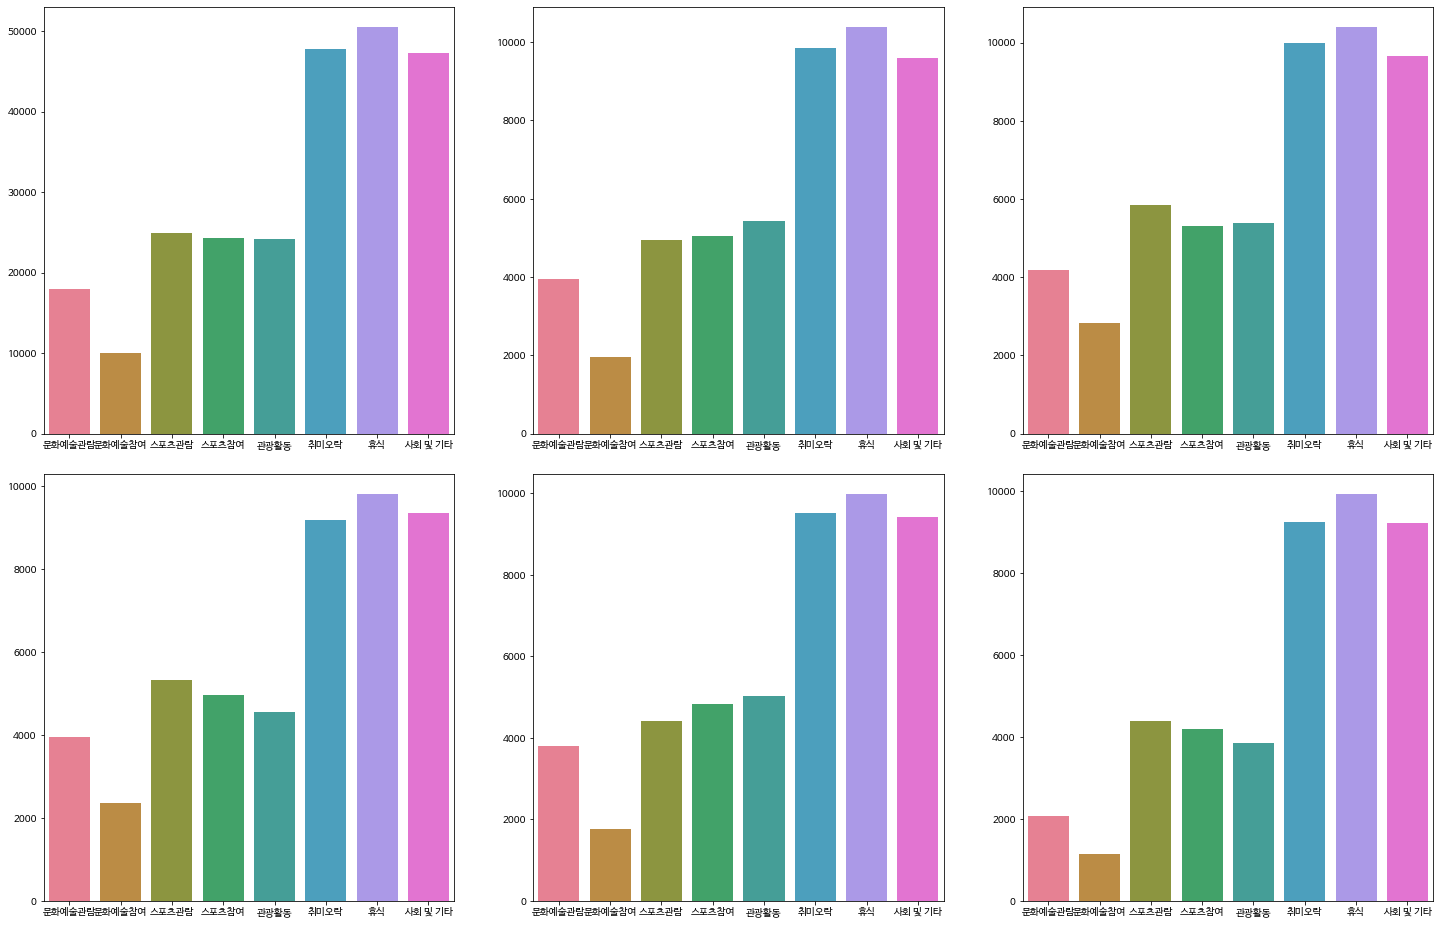

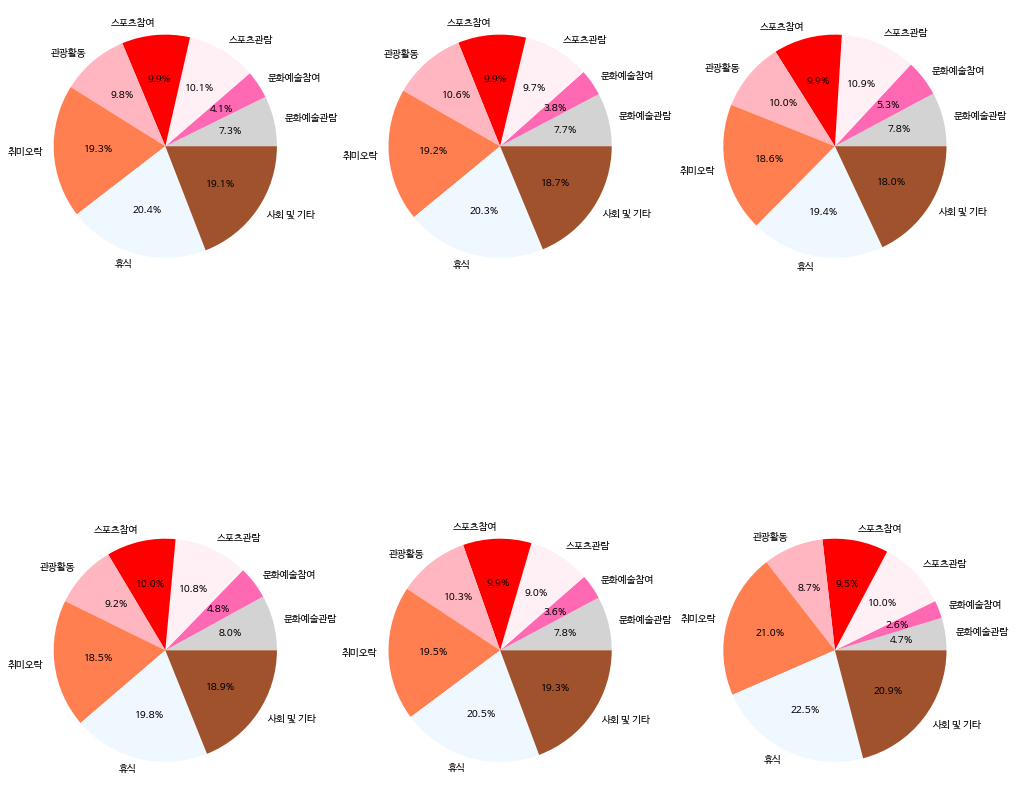

In [70]:
temfig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,13))
plt.tight_layout(h_pad=2, w_pad=5)


#[평일]분야별 전체 참여 여가 수 비교
temp = sum(weekday_act.Q11_1_A.value_counts().drop(['없음','무응답']))
temp2 = sum(weekday_act.Q11_1_B.value_counts().drop(['없음','무응답']))
temp3 = sum(weekday_act.Q11_1_C.value_counts().drop(['없음','무응답']))
temp4 = sum(weekday_act.Q11_1_D.value_counts().drop(['없음','무응답']))
temp5 = sum(weekday_act.Q11_1_E.value_counts().drop(['없음','무응답']))
temp6 = sum(weekday_act.Q11_1_F.value_counts().drop(['없음','무응답']))
temp7 = sum(weekday_act.Q11_1_G.value_counts().drop(['없음','무응답']))
temp8 = sum(weekday_act.Q11_1_H.value_counts().drop(['없음','무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.figure(figsize=(17,17))
plt.subplot(231)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,0],palette='husl')

#[평일]2016년 분야별 참여 여가 수 비교
temp = sum(weekday_act_2016.Q11_1_A.value_counts().drop(['없음']))
temp2 = sum(weekday_act_2016.Q11_1_B.value_counts().drop(['없음']))
temp3 = sum(weekday_act_2016.Q11_1_C.value_counts().drop(['없음']))
temp4 = sum(weekday_act_2016.Q11_1_D.value_counts().drop(['없음']))
temp5 = sum(weekday_act_2016.Q11_1_E.value_counts().drop(['없음']))
temp6 = sum(weekday_act_2016.Q11_1_F.value_counts().drop(['없음']))
temp7 = sum(weekday_act_2016.Q11_1_G.value_counts().drop(['없음']))
temp8 = sum(weekday_act_2016.Q11_1_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(232)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div,ax=ax[0,1],palette='husl')

#[평일]2018년 분야별 참여 여가 수 비교
temp = sum(weekday_act_2018.Q11_1_A.value_counts().drop(['없음']))
temp2 = sum(weekday_act_2018.Q11_1_B.value_counts().drop(['없음']))
temp3 = sum(weekday_act_2018.Q11_1_C.value_counts().drop(['없음']))
temp4 = sum(weekday_act_2018.Q11_1_D.value_counts().drop(['없음']))
temp5 = sum(weekday_act_2018.Q11_1_E.value_counts().drop(['없음']))
temp6 = sum(weekday_act_2018.Q11_1_F.value_counts().drop(['없음']))
temp7 = sum(weekday_act_2018.Q11_1_G.value_counts().drop(['없음']))
temp8 = sum(weekday_act_2018.Q11_1_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(233)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,2],palette='husl')

#[평일]2019년 분야별 참여 여가 수 비교
temp = sum(weekday_act_2019.Q11_1_A.value_counts().drop(['무응답']))
temp2 = sum(weekday_act_2019.Q11_1_B.value_counts().drop(['무응답']))
temp3 = sum(weekday_act_2019.Q11_1_C.value_counts().drop(['무응답']))
temp4 = sum(weekday_act_2019.Q11_1_D.value_counts().drop(['무응답']))
temp5 = sum(weekday_act_2019.Q11_1_E.value_counts().drop(['무응답']))
temp6 = sum(weekday_act_2019.Q11_1_F.value_counts().drop(['무응답']))
temp7 = sum(weekday_act_2019.Q11_1_G.value_counts().drop(['무응답']))
temp8 = sum(weekday_act_2019.Q11_1_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(234)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,0],palette='husl')

#[평일]2020년 분야별 참여 여가 수 비교
temp = sum(weekday_act_2020.Q11_1_A.value_counts().drop(['무응답']))
temp2 = sum(weekday_act_2020.Q11_1_B.value_counts().drop(['무응답']))
temp3 = sum(weekday_act_2020.Q11_1_C.value_counts().drop(['무응답']))
temp4 = sum(weekday_act_2020.Q11_1_D.value_counts().drop(['무응답']))
temp5 = sum(weekday_act_2020.Q11_1_E.value_counts().drop(['무응답']))
temp6 = sum(weekday_act_2020.Q11_1_F.value_counts().drop(['무응답']))
temp7 = sum(weekday_act_2020.Q11_1_G.value_counts().drop(['무응답']))
temp8 = sum(weekday_act_2020.Q11_1_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(235)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,1],palette='husl')

#[평일]2021년 분야별 참여 여가 수 비교
temp = sum(weekday_act_2021.Q11_1_A.value_counts().drop(['없음']))
temp2 = sum(weekday_act_2021.Q11_1_B.value_counts().drop(['없음']))
temp3 = sum(weekday_act_2021.Q11_1_C.value_counts().drop(['없음']))
temp4 = sum(weekday_act_2021.Q11_1_D.value_counts().drop(['없음']))
temp5 = sum(weekday_act_2021.Q11_1_E.value_counts().drop(['없음']))
temp6 = sum(weekday_act_2021.Q11_1_F.value_counts().drop(['없음']))
temp7 = sum(weekday_act_2021.Q11_1_G.value_counts().drop(['없음']))
temp8 = sum(weekday_act_2021.Q11_1_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(236)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div ,ax=ax[1,2],palette='husl')

### **[평일] 여가 활동 분야별 만족도 변화 및 흐름**

In [71]:
#[평일] 여가 활동 분야별 만족도
mask1 = (weekday_st.year == 2014)
weekday_st_2014 = weekday_st.loc[mask1, :]

mask2 = (weekday_st.year == 2015)
weekday_st_2015 = weekday_st.loc[mask2, :]

mask3 = (weekday_st.year == 2016)
weekday_st_2016 = weekday_st.loc[mask3, :]

mask4 = (weekday_st.year == 2017)
weekday_st_2017 = weekday_st.loc[mask4, :]

mask5 = (weekday_st.year == 2018)
weekday_st_2018 = weekday_st.loc[mask5, :]

mask6 = (weekday_st.year == 2019)
weekday_st_2019 = weekday_st.loc[mask6, :]

mask7 = (weekday_st.year == 2020)
weekday_st_2020 = weekday_st.loc[mask7, :]

mask8 = (weekday_st.year == 2021)
weekday_st_2021 = weekday_st.loc[mask8, :]

In [72]:
##Q11_2_A에 참여 만족도가 없음
div_cols_st = ['문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']

# 2014년에는 만족도 평가가 없음
st2014temp = weekday_st_2014.Q11_2_B.value_counts().dropna()
st2014temp2 = weekday_st_2014.Q11_2_C.value_counts().dropna()
st2014temp3 = weekday_st_2014.Q11_2_D.value_counts().dropna()
st2014temp4 = weekday_st_2014.Q11_2_E.value_counts().dropna()
st2014temp5 = weekday_st_2014.Q11_2_F.value_counts().dropna()
st2014temp6 = weekday_st_2014.Q11_2_G.value_counts().dropna()
st2014temp7 = weekday_st_2014.Q11_2_H.value_counts().dropna()

participate_div2014 = [st2014temp,st2014temp2,st2014temp3,st2014temp4,st2014temp5,st2014temp6,st2014temp7]
participate_div2_2014 = pd.DataFrame(participate_div2014, index = div_cols_st)

#
st2016temp = weekday_st_2016.Q11_2_B.value_counts().dropna()
st2016temp2 = weekday_st_2016.Q11_2_C.value_counts().dropna()
st2016temp3 = weekday_st_2016.Q11_2_D.value_counts().dropna()
st2016temp4 = weekday_st_2016.Q11_2_E.value_counts().dropna()
st2016temp5 = weekday_st_2016.Q11_2_F.value_counts().dropna()
st2016temp6 = weekday_st_2016.Q11_2_G.value_counts().dropna()
st2016temp7 = weekday_st_2016.Q11_2_H.value_counts().dropna()

participate_div2016 = [st2016temp,st2016temp2,st2016temp3,st2016temp4,st2016temp5,st2016temp6,st2016temp7]
participate_div2_2016 = pd.DataFrame(participate_div2016, index = div_cols_st)


#
st2018temp = weekday_st_2018.Q11_2_B.value_counts().dropna()
st2018temp2 = weekday_st_2018.Q11_2_C.value_counts().dropna()
st2018temp3 = weekday_st_2018.Q11_2_D.value_counts().dropna()
st2018temp4 = weekday_st_2018.Q11_2_E.value_counts().dropna()
st2018temp5 = weekday_st_2018.Q11_2_F.value_counts().dropna()
st2018temp6 = weekday_st_2018.Q11_2_G.value_counts().dropna()
st2018temp7 = weekday_st_2018.Q11_2_H.value_counts().dropna()

participate_div2018 = [st2018temp,st2018temp2,st2018temp3,st2018temp4,st2018temp5,st2018temp6,st2018temp7]
participate_div2_2018 = pd.DataFrame(participate_div2018, index = div_cols_st)


#
st2019temp = weekday_st_2019.Q11_2_B.value_counts().dropna()
st2019temp2 = weekday_st_2019.Q11_2_C.value_counts().dropna()
st2019temp3 = weekday_st_2019.Q11_2_D.value_counts().dropna()
st2019temp4 = weekday_st_2019.Q11_2_E.value_counts().dropna()
st2019temp5 = weekday_st_2019.Q11_2_F.value_counts().dropna()
st2019temp6 = weekday_st_2019.Q11_2_G.value_counts().dropna()
st2019temp7 = weekday_st_2019.Q11_2_H.value_counts().dropna()

participate_div2019 = [st2019temp,st2019temp2,st2019temp3,st2019temp4,st2019temp5,st2019temp6,st2019temp7]
participate_div2_2019 = pd.DataFrame(participate_div2019, index = div_cols_st)


#
st2020temp = weekday_st_2020.Q11_2_B.value_counts().dropna()
st2020temp2 = weekday_st_2020.Q11_2_C.value_counts().dropna()
st2020temp3 = weekday_st_2020.Q11_2_D.value_counts().dropna()
st2020temp4 = weekday_st_2020.Q11_2_E.value_counts().dropna()
st2020temp5 = weekday_st_2020.Q11_2_F.value_counts().dropna()
st2020temp6 = weekday_st_2020.Q11_2_G.value_counts().dropna()
st2020temp7 = weekday_st_2020.Q11_2_H.value_counts().dropna()

participate_div2020 = [st2020temp,st2020temp2,st2020temp3,st2020temp4,st2020temp5,st2020temp6,st2020temp7]
participate_div2_2020 = pd.DataFrame(participate_div2020, index = div_cols_st)


#
st2021temp =  weekday_st_2021.Q11_2_B.value_counts().dropna()
st2021temp2 = weekday_st_2021.Q11_2_C.value_counts().dropna()
st2021temp3 = weekday_st_2021.Q11_2_D.value_counts().dropna()
st2021temp4 = weekday_st_2021.Q11_2_E.value_counts().dropna()
st2021temp5 = weekday_st_2021.Q11_2_F.value_counts().dropna()
st2021temp6 = weekday_st_2021.Q11_2_G.value_counts().dropna()
st2021temp7 = weekday_st_2021.Q11_2_H.value_counts().dropna()

participate_div2021 = [st2021temp,st2021temp2,st2021temp3,st2021temp4,st2021temp5,st2021temp6,st2021temp7]
participate_div2_2021 = pd.DataFrame(participate_div2021, index = div_cols_st)


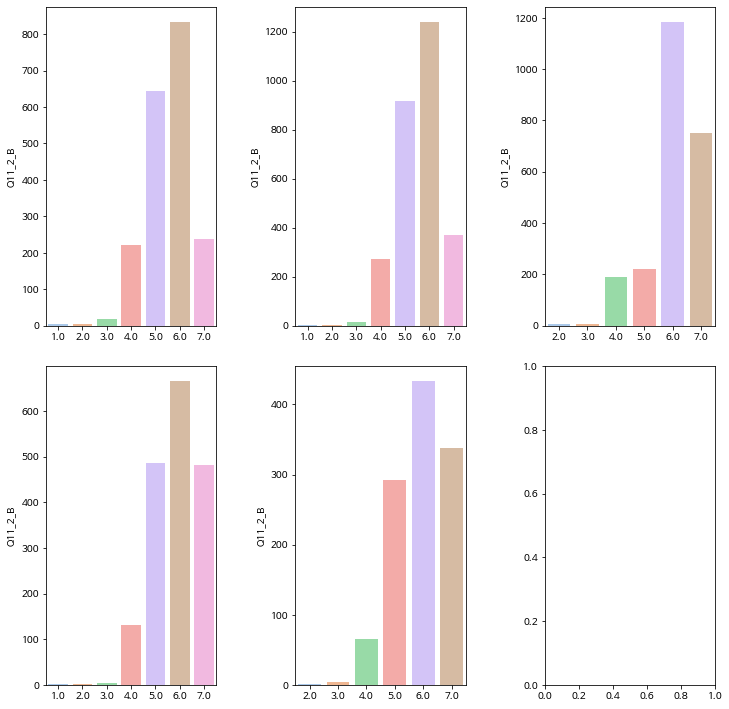

In [73]:
#[평일]2016-2021 "문화참여" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2018temp, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2019temp, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2021temp, ax=ax[1,1], palette='pastel')

                0
2016년  280.285714
2018년  402.285714
2019년  391.833333
2020년  252.857143
2021년  188.833333


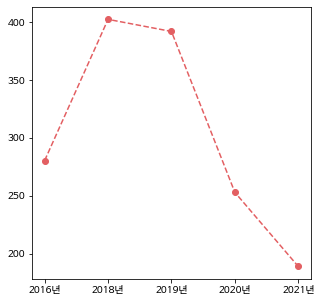

In [74]:
#[평일]2016-2021 연도별 "문화참여" 만족도 흐름
mean = np.mean(st2016temp)
mean1 = np.mean(st2018temp)
mean2 = np. mean(st2019temp)
mean3 = np. mean (st2020temp)
mean4 = np.mean(st2021temp)

culact_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
culact_mean = pd.DataFrame(culact_list,year_list)

print(culact_mean)

plt.figure(figsize=(5,5))
s=culact_mean[0]
plt.plot(s.index, s.values,color='#e35f62',
         marker='o', linestyle='--')

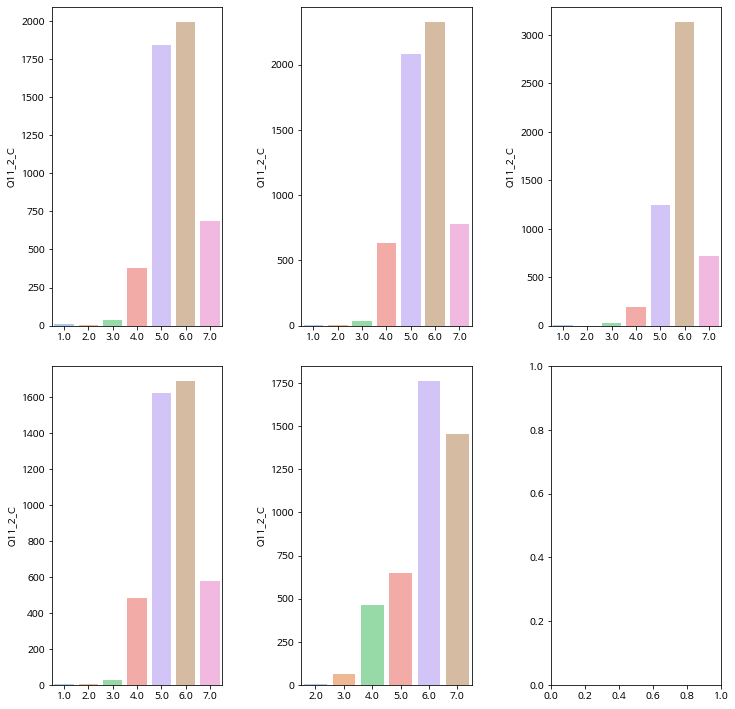

In [75]:
#[평일]2016-2021 "스포츠관람" 만족도 변화

st2021temp32 = pd.DataFrame(weekday_st_2021.Q11_2_C.value_counts().dropna())
st2016temp32 = pd.DataFrame(weekday_st_2016.Q11_2_C.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp2, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2018temp2, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2019temp2, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp2, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2021temp2, ax=ax[1,1], palette='pastel')

                0
2016년  707.714286
2018년  836.285714
2019년  761.142857
2020년  629.142857
2021년  732.833333


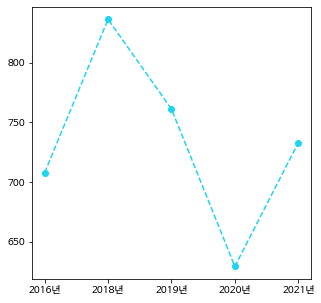

In [76]:
#[평일]2016-2021 연도별 "스포츠관람" 만족도 흐름
mean = np.mean(st2016temp2)
mean1 = np.mean(st2018temp2)
mean2 = np. mean(st2019temp2)
mean3 = np. mean (st2020temp2)
mean4 = np.mean(st2021temp2)

sptwat_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
sptwat_mean = pd.DataFrame(sptwat_list,year_list)

print(sptwat_mean)

plt.figure(figsize=(5,5))
s=sptwat_mean[0]
plt.plot(s.index, s.values,color='#1DD5EE',
         marker='o', linestyle='--')

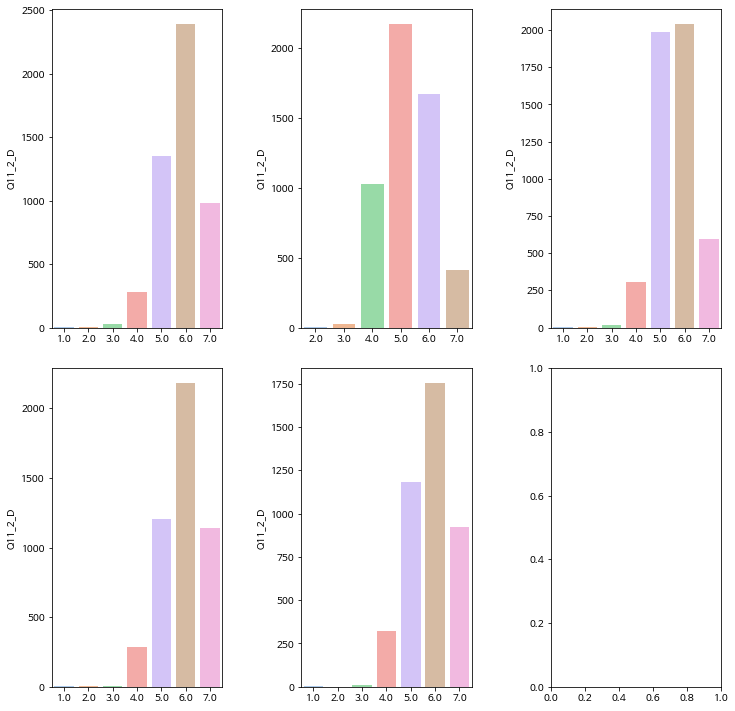

In [77]:
#[평일]2016-2021 "스포츠참여" 만족도 변화

st2021temp33 = pd.DataFrame(weekday_st_2021.Q11_2_D.value_counts().dropna())
st2016temp33 = pd.DataFrame(weekday_st_2016.Q11_2_D.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp33.index, y = st2016temp3, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2021temp32.index, y = st2018temp3, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2016temp33.index, y = st2019temp3, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp33.index, y = st2020temp3, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp33.index, y = st2021temp3, ax=ax[1,1], palette='pastel')

                0
2016년  719.714286
2018년  885.166667
2019년  708.000000
2020년  689.000000
2021년  599.714286


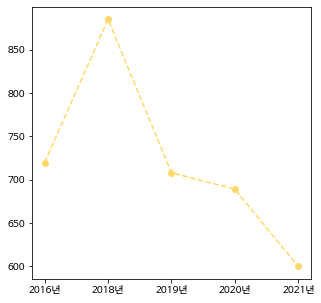

In [78]:
#[평일]2016-2021 연도별 "스포츠참여" 만족도 흐름
mean = np.mean(st2016temp3)
mean1 = np.mean(st2018temp3)
mean2 = np. mean(st2019temp3)
mean3 = np. mean (st2020temp3)
mean4 = np.mean(st2021temp3)

spt_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
spt_mean = pd.DataFrame(spt_list,year_list)

print(spt_mean)

plt.figure(figsize=(5,5))
s=spt_mean[0]
plt.plot(s.index, s.values,color='#FFD86C',
         marker='o', linestyle='--')

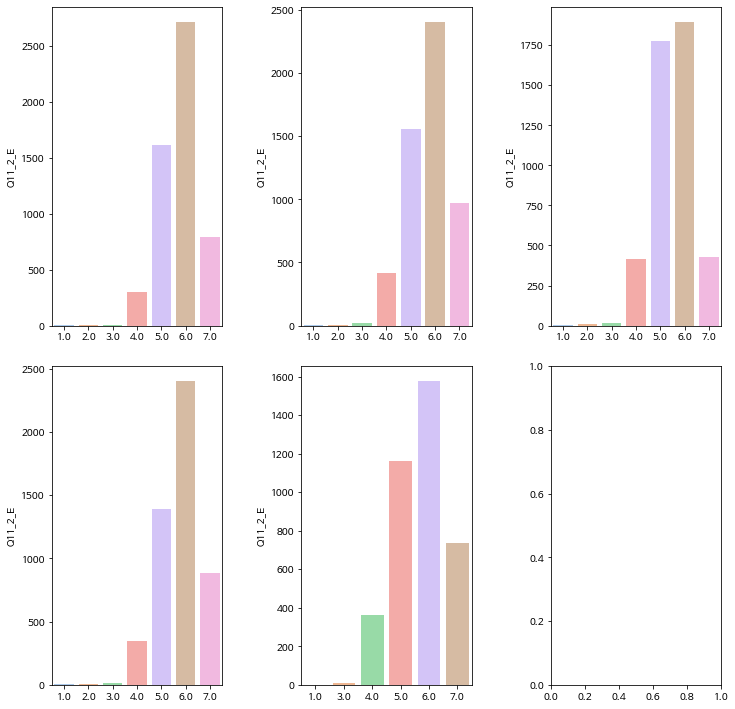

In [79]:
#[평일]2016-2021 "관광활동" 만족도 변화

st2021temp34 = pd.DataFrame(weekday_st_2021.Q11_2_E.value_counts().dropna())
st2016temp34 = pd.DataFrame(weekday_st_2016.Q11_2_E.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp34.index, y = st2016temp4, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp34.index, y = st2018temp4, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2016temp34.index, y = st2019temp4, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp34.index, y = st2020temp4, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp34.index, y = st2021temp4, ax=ax[1,1], palette='pastel')

                0
2016년  774.857143
2018년  767.857143
2019년  648.571429
2020년  719.571429
2021년  641.166667


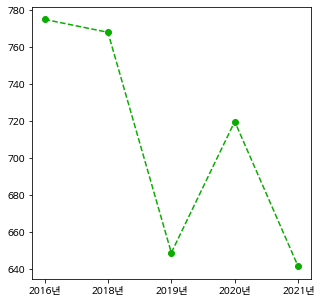

In [80]:
#[평일]2016-2021 연도별 "관광활동" 만족도 흐름
mean = np.mean(st2016temp4)
mean1 = np.mean(st2018temp4)
mean2 = np. mean(st2019temp4)
mean3 = np. mean (st2020temp4)
mean4 = np.mean(st2021temp4)

t_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
t_mean = pd.DataFrame(t_list,year_list)

print(t_mean)

plt.figure(figsize=(5,5))
s=t_mean[0]
plt.plot(s.index, s.values,color='#0AAC00',
         marker='o', linestyle='--')

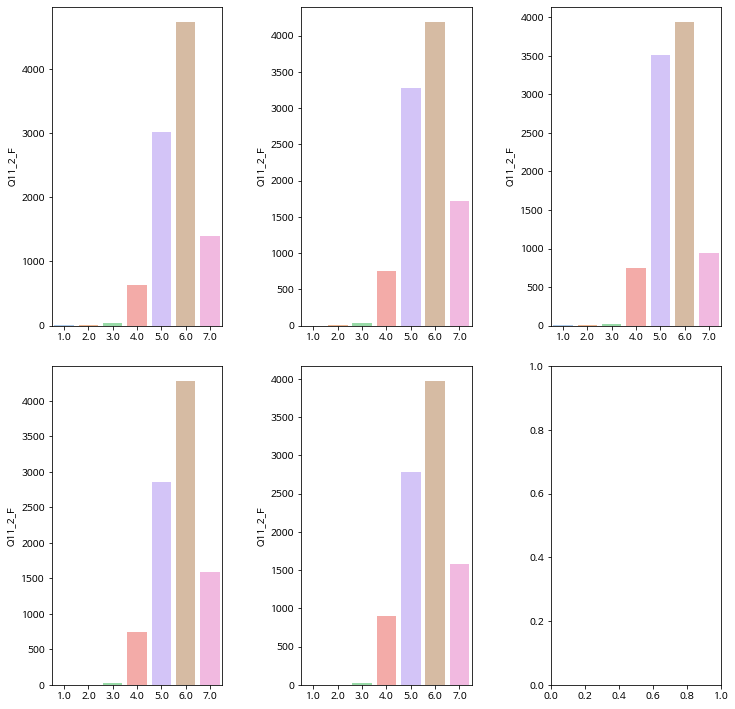

In [81]:
#[평일]2016-2021 "취미오락" 만족도 변화

st2021temp35 = pd.DataFrame(weekday_st_2021.Q11_2_F.value_counts().dropna())
st2016temp35 = pd.DataFrame(weekday_st_2016.Q11_2_F.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp35.index, y = st2016temp5, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp35.index, y = st2018temp5, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2016temp35.index, y = st2019temp5, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp35.index, y = st2020temp5, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp35.index, y = st2021temp5, ax=ax[1,1], palette='pastel')

                 0
2016년  1406.000000
2018년  1427.428571
2019년  1309.714286
2020년  1358.000000
2021년  1321.571429


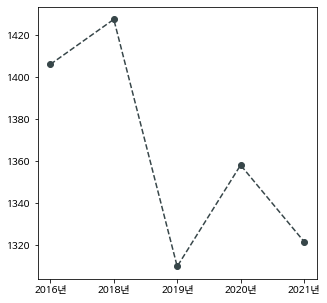

In [82]:
#[평일]2016-2021 연도별 "취미오락" 만족도 흐름
mean = np.mean(st2016temp5)
mean1 = np.mean(st2018temp5)
mean2 = np. mean(st2019temp5)
mean3 = np. mean (st2020temp5)
mean4 = np.mean(st2021temp5)

hb_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
hb_mean = pd.DataFrame(hb_list,year_list)

print(hb_mean)

plt.figure(figsize=(5,5))
s=hb_mean[0]
plt.plot(s.index, s.values,color='#374649',
         marker='o', linestyle='--')

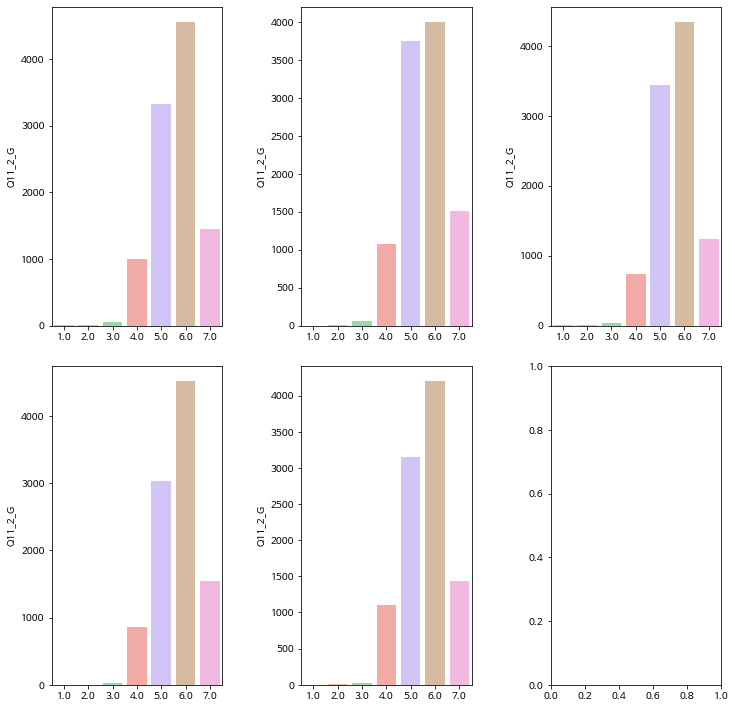

In [83]:
#[평일]2016-2021 "휴식" 만족도 변화

st2021temp36 = pd.DataFrame(weekday_st_2021.Q11_2_G.value_counts().dropna())
st2016temp36 = pd.DataFrame(weekday_st_2016.Q11_2_G.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp36.index, y = st2016temp6, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp36.index, y = st2018temp6, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2016temp36.index, y = st2019temp6, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp36.index, y = st2020temp6, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp36.index, y = st2021temp6, ax=ax[1,1], palette='pastel')

                 0
2016년  1483.285714
2018년  1484.571429
2019년  1399.000000
2020년  1425.000000
2021년  1418.000000


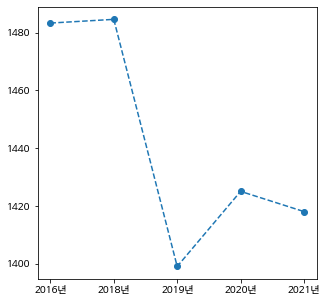

In [84]:
#[평일]2016-2021 연도별 "휴식" 만족도 흐름
mean = np.mean(st2016temp6)
mean1 = np.mean(st2018temp6)
mean2 = np. mean(st2019temp6)
mean3 = np. mean (st2020temp6)
mean4 = np.mean(st2021temp6)

res_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
res_mean = pd.DataFrame(res_list,year_list)

print(res_mean)

plt.figure(figsize=(5,5))
s=res_mean[0]
plt.plot(s.index, s.values,
         marker='o', linestyle='--')

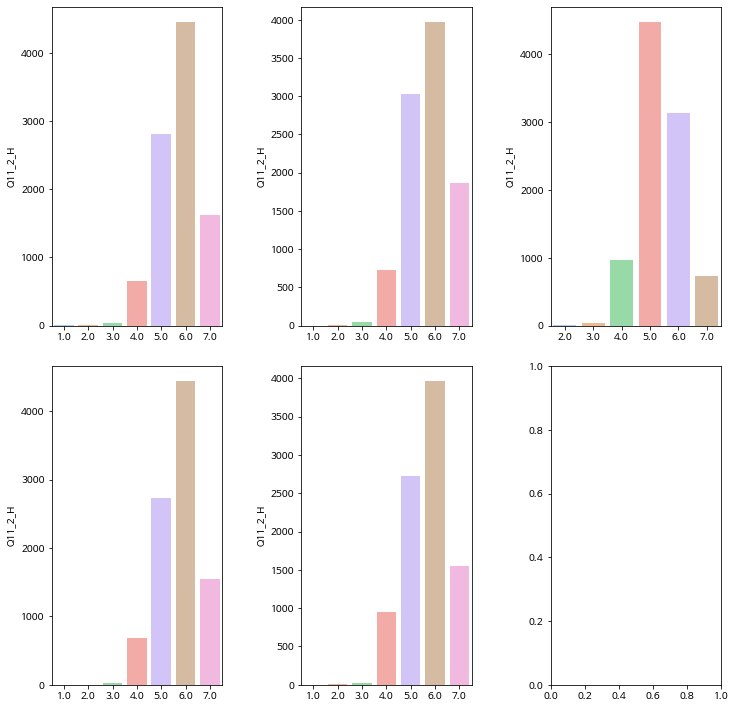

In [85]:
#[평일]2016-2021 "사회 및 기타" 만족도 변화

st2021temp37 = pd.DataFrame(weekday_st_2021.Q11_2_H.value_counts().dropna())
st2016temp37 = pd.DataFrame(weekday_st_2016.Q11_2_H.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp37.index, y = st2016temp7, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp37.index, y = st2018temp7, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp32.index, y = st2019temp7, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp37.index, y = st2020temp7, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp37.index, y = st2021temp7, ax=ax[1,1], palette='pastel')

                 0
2016년  1369.142857
2018년  1377.714286
2019년  1558.166667
2020년  1345.571429
2021년  1317.000000


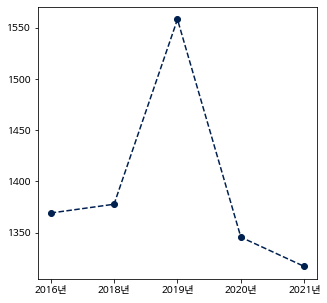

In [86]:
#[평일]2016-2021 연도별 "사회 및 기타" 만족도 흐름
mean = np.mean(st2016temp7)
mean1 = np.mean(st2018temp7)
mean2 = np. mean(st2019temp7)
mean3 = np. mean (st2020temp7)
mean4 = np.mean(st2021temp7)

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.figure(figsize=(5,5))
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

### **[평일] 희망 여가 수 비교**

In [87]:
mask1 = (weekday_hp.year == 2014)
weekday_hp_2014 = weekday_hp.loc[mask1, :]

mask2 = (weekday_hp.year == 2016)
weekday_hp_2016 = weekday_hp.loc[mask2, :]

mask3 = (weekday_hp.year == 2018)
weekday_hp_2018 = weekday_hp.loc[mask3, :]

mask4 = (weekday_hp.year == 2019)
weekday_hp_2019 = weekday_hp.loc[mask4, :]

mask5 = (weekday_hp.year == 2020)
weekday_hp_2020 = weekday_hp.loc[mask5, :]

mask6 = (weekday_hp.year == 2021)
weekday_hp_2021 = weekday_hp.loc[mask6, :]

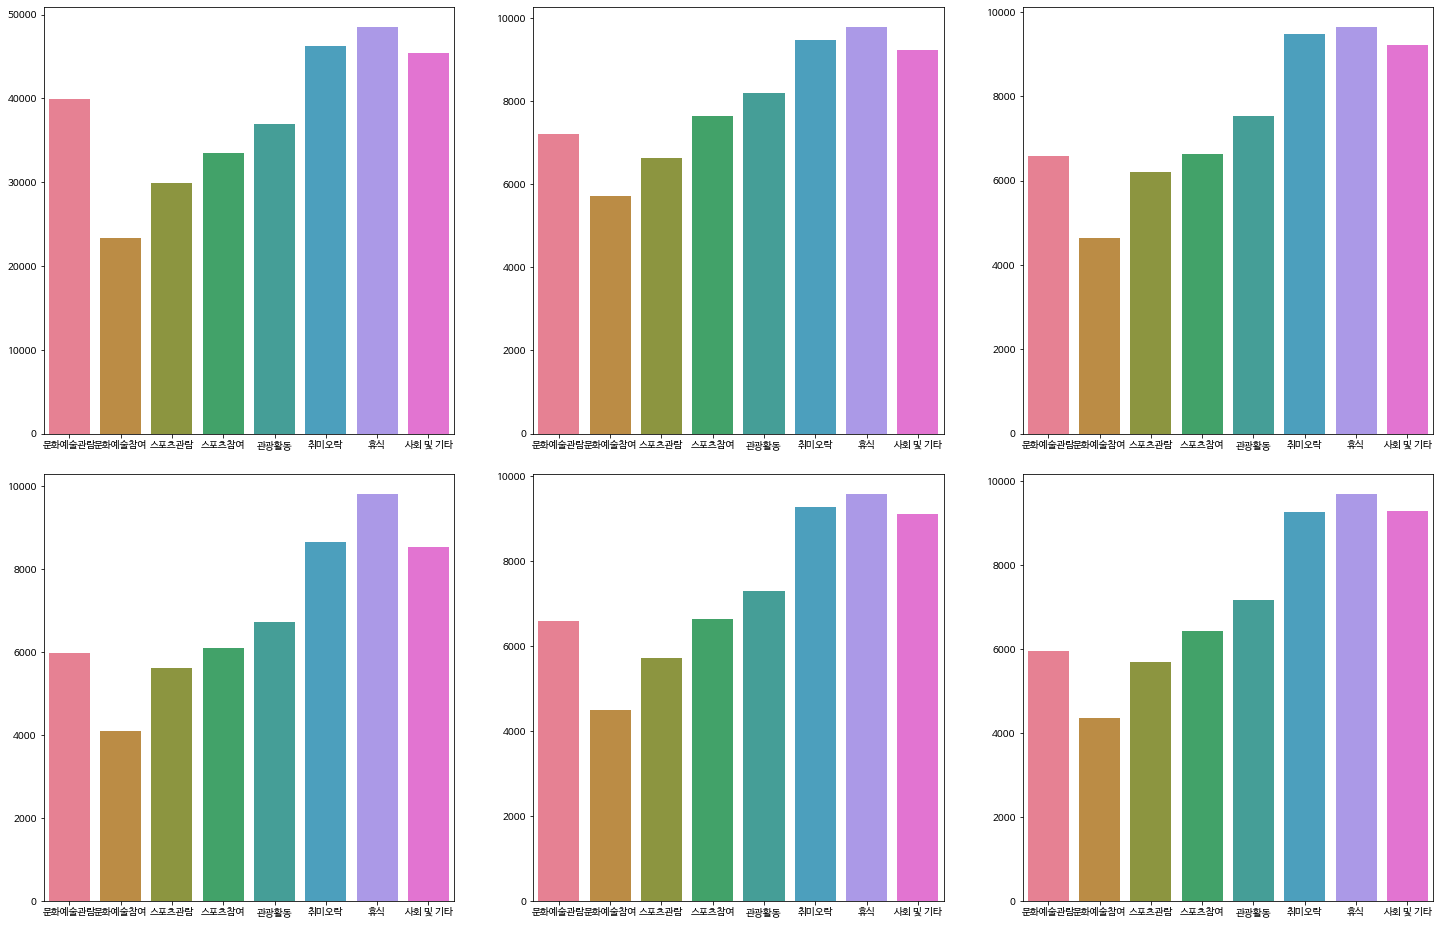

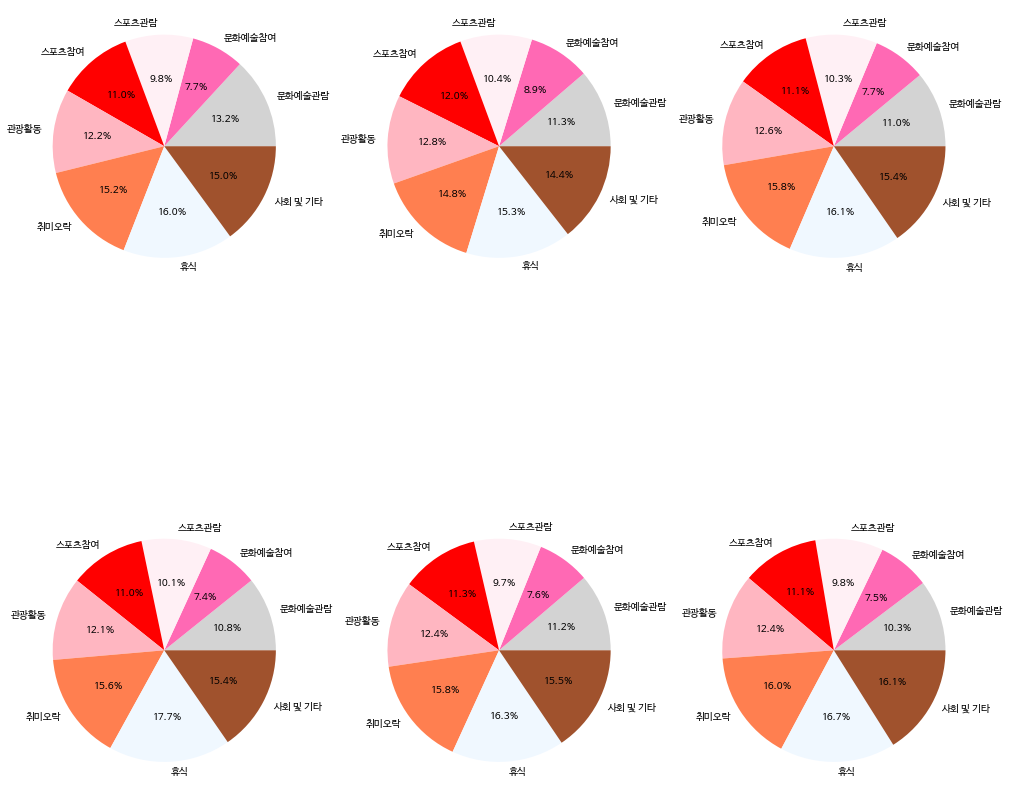

In [88]:
temfig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,13))
plt.tight_layout(h_pad=2, w_pad=5)


#[평일]분야별 전체 희망 여가 수 비교
temp = sum(weekday_hp.Q11_3_A.value_counts().drop(['98']))
temp2 = sum(weekday_hp.Q11_3_B.value_counts().drop(['없음','무응답']))
temp3 = sum(weekday_hp.Q11_3_C.value_counts().drop(['없음','무응답']))
temp4 = sum(weekday_hp.Q11_3_D.value_counts().drop(['없음','무응답']))
temp5 = sum(weekday_hp.Q11_3_E.value_counts().drop(['없음','무응답']))
temp6 = sum(weekday_hp.Q11_3_F.value_counts().drop(['없음','무응답']))
temp7 = sum(weekday_hp.Q11_3_G.value_counts().drop(['없음','무응답']))
temp8 = sum(weekday_hp.Q11_3_H.value_counts().drop(['없음','무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.figure(figsize=(17,17))
plt.subplot(231)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)

plot = sns.barplot(x = participate_div2.index , y = participate_div ,ax=ax[0,0],palette='husl')

#[평일]2016년 분야별 참여 여가 수 비교
temp = sum(weekday_hp_2016.Q11_3_A.value_counts().drop(['98']))
temp2 = sum(weekday_hp_2016.Q11_3_B.value_counts().drop(['없음']))
temp3 = sum(weekday_hp_2016.Q11_3_C.value_counts().drop(['없음']))
temp4 = sum(weekday_hp_2016.Q11_3_D.value_counts().drop(['없음']))
temp5 = sum(weekday_hp_2016.Q11_3_E.value_counts().drop(['없음']))
temp6 = sum(weekday_hp_2016.Q11_3_F.value_counts().drop(['없음']))
temp7 = sum(weekday_hp_2016.Q11_3_G.value_counts().drop(['없음']))
temp8 = sum(weekday_hp_2016.Q11_3_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(232)
pie2 =plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors = colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div ,ax=ax[0,1],palette='husl')

#[평일]2018년 분야별 참여 여가 수 비교
temp = sum(weekday_hp_2018.Q11_3_A.value_counts().drop(['98']))
temp2 = sum(weekday_hp_2018.Q11_3_B.value_counts().drop(['없음']))
temp3 = sum(weekday_hp_2018.Q11_3_C.value_counts().drop(['없음']))
temp4 = sum(weekday_hp_2018.Q11_3_D.value_counts().drop(['없음']))
temp5 = sum(weekday_hp_2018.Q11_3_E.value_counts().drop(['없음']))
temp6 = sum(weekday_hp_2018.Q11_3_F.value_counts().drop(['없음']))
temp7 = sum(weekday_hp_2018.Q11_3_G.value_counts().drop(['없음']))
temp8 = sum(weekday_hp_2018.Q11_3_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(233)
pie3 =plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors = colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div ,ax=ax[0,2],palette='husl')

#[평일]2019년 분야별 참여 여가 수 비교
temp = sum(weekday_hp_2019.Q11_3_A.value_counts().drop(['99']))
temp2 = sum(weekday_hp_2019.Q11_3_B.value_counts().drop(['무응답']))
temp3 = sum(weekday_hp_2019.Q11_3_C.value_counts().drop(['무응답']))
temp4 = sum(weekday_hp_2019.Q11_3_D.value_counts().drop(['무응답']))
temp5 = sum(weekday_hp_2019.Q11_3_E.value_counts().drop(['무응답']))
temp6 = sum(weekday_hp_2019.Q11_3_F.value_counts().drop(['무응답']))
temp7 = sum(weekday_hp_2019.Q11_3_G.value_counts().drop(['무응답']))
temp8 = sum(weekday_hp_2019.Q11_3_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(234)
pie4 =plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors = colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div ,ax=ax[1,0],palette='husl')

#[평일]2020년 분야별 참여 여가 수 비교
temp = sum(weekday_hp_2020.Q11_3_A.value_counts().drop(['99']))
temp2 = sum(weekday_hp_2020.Q11_3_B.value_counts().drop(['무응답']))
temp3 = sum(weekday_hp_2020.Q11_3_C.value_counts().drop(['무응답']))
temp4 = sum(weekday_hp_2020.Q11_3_D.value_counts().drop(['무응답']))
temp5 = sum(weekday_hp_2020.Q11_3_E.value_counts().drop(['무응답']))
temp6 = sum(weekday_hp_2020.Q11_3_F.value_counts().drop(['무응답']))
temp7 = sum(weekday_hp_2020.Q11_3_G.value_counts().drop(['무응답']))
temp8 = sum(weekday_hp_2020.Q11_3_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(235)
pie5 =plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors = colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div ,ax=ax[1,1],palette='husl')

#[평일]2021년 분야별 참여 여가 수 비교
temp = sum(weekday_hp_2021.Q11_3_A.value_counts().drop(['98']))
temp2 = sum(weekday_hp_2021.Q11_3_B.value_counts().drop(['없음']))
temp3 = sum(weekday_hp_2021.Q11_3_C.value_counts().drop(['없음']))
temp4 = sum(weekday_hp_2021.Q11_3_D.value_counts().drop(['없음']))
temp5 = sum(weekday_hp_2021.Q11_3_E.value_counts().drop(['없음']))
temp6 = sum(weekday_hp_2021.Q11_3_F.value_counts().drop(['없음']))
temp7 = sum(weekday_hp_2021.Q11_3_G.value_counts().drop(['없음']))
temp8 = sum(weekday_hp_2021.Q11_3_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)

plt.subplot(236)
plot = sns.barplot(x = participate_div2.index , y = participate_div ,ax=ax[1,2],palette='husl')
pie6 =plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors = colors)


### **[평일]여가 활동 분야별 희망 변화 흐름**
-굳이 필요없었던듯

                 0
2016년   902.625000
2018년  1377.714286
2019년   824.625000
2020년   747.125000
2021년   733.666667
                 0
2016년   816.428571
2018년  1377.714286
2019년   661.428571
2020년   586.571429
2021년   641.714286
                 0
2016년  1659.500000
2018년  1377.714286
2019년  1551.000000
2020년  1405.000000
2021년  1143.200000
                 0
2016년   425.222222
2018년  1377.714286
2019년   368.833333
2020년   339.000000
2021년   331.900000
                 0
2016년   744.272727
2018년  1377.714286
2019년   685.454545
2020년   611.363636
2021년   609.083333
                 0
2016년   499.105263
2018년  1377.714286
2019년   451.857143
2020년   393.772727
2021년   387.041667
                 0
2016년  1086.666667
2018년  1377.714286
2019년  1071.222222
2020년  1089.111111
2021년  1063.777778
                 0
2016년  1024.777778
2018년  1377.714286
2019년  1024.000000
2020년   948.444444
2021년   912.400000


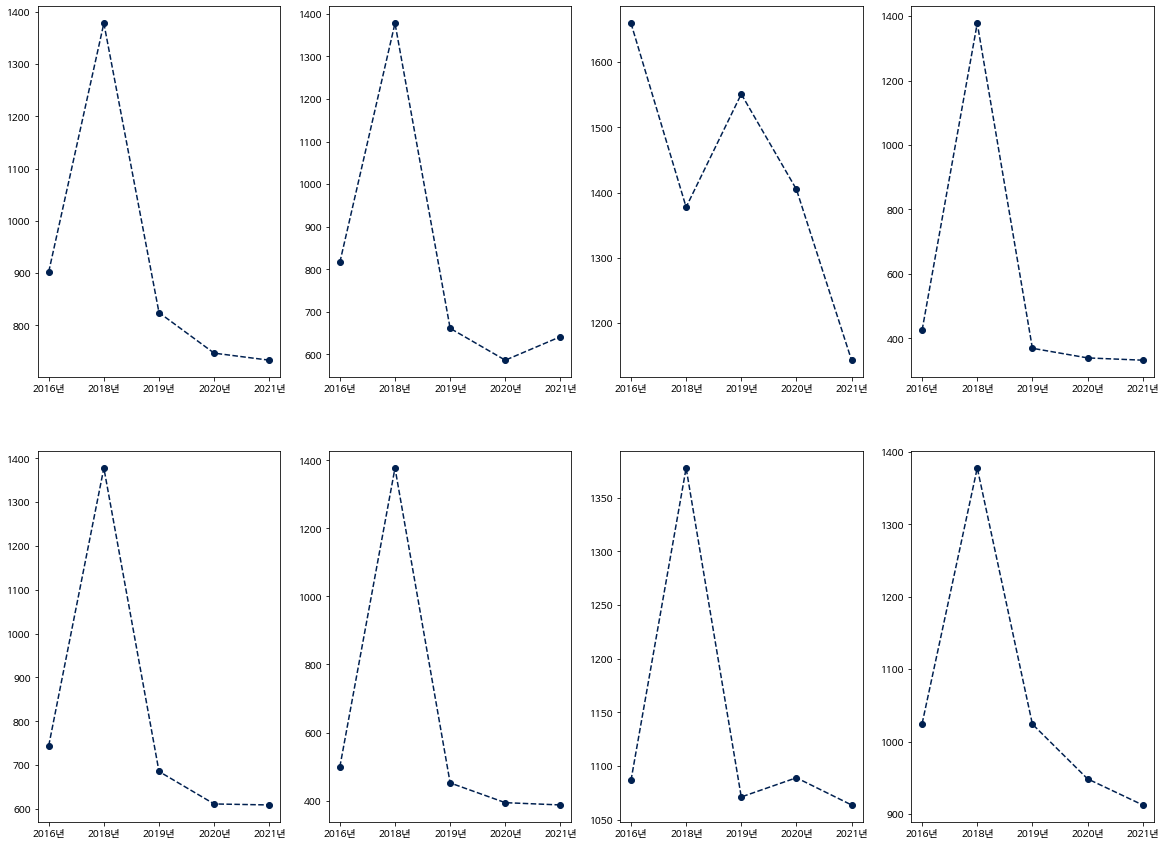

In [89]:
#문화 관람 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_A.value_counts().drop(['98']))
mean2 =np.mean(weekday_hp_2018.Q11_3_A.value_counts().drop(['98']))
mean3 =np.mean(weekday_hp_2019.Q11_3_A.value_counts().drop(['99']))
mean4 = np.mean(weekday_hp_2020.Q11_3_A.value_counts().drop(['99']))
mean5 = np.mean(weekday_hp_2021.Q11_3_A.value_counts().drop(['98']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.figure(figsize=(20,15))
plt.subplot(241)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#문화 참여 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_B.value_counts().drop(['없음']))
mean2 = np.mean(weekday_hp_2018.Q11_3_B.value_counts().drop(['없음']))
mean3 = np.mean(weekday_hp_2019.Q11_3_B.value_counts().drop(['무응답']))
mean4 = np.mean(weekday_hp_2020.Q11_3_B.value_counts().drop(['무응답']))
mean5 = np.mean(weekday_hp_2021.Q11_3_B.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(242)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#스포츠 관람 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_C.value_counts().drop(['없음']))
mean2 = np.mean(weekday_hp_2018.Q11_3_C.value_counts().drop(['없음']))
mean3 = np.mean(weekday_hp_2019.Q11_3_C.value_counts().drop(['무응답']))
mean4 = np.mean(weekday_hp_2020.Q11_3_C.value_counts().drop(['무응답']))
mean5 = np.mean(weekday_hp_2021.Q11_3_C.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(243)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#스포츠 참여 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_D.value_counts().drop(['없음']))
mean2 = np.mean(weekday_hp_2018.Q11_3_D.value_counts().drop(['없음']))
mean3 = np.mean(weekday_hp_2019.Q11_3_D.value_counts().drop(['무응답']))
mean4 = np.mean(weekday_hp_2020.Q11_3_D.value_counts().drop(['무응답']))
mean5 = np.mean(weekday_hp_2021.Q11_3_D.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(244)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#관광 활동 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_E.value_counts().drop(['없음']))
mean2 = np.mean(weekday_hp_2018.Q11_3_E.value_counts().drop(['없음']))
mean3 = np.mean(weekday_hp_2019.Q11_3_E.value_counts().drop(['무응답']))
mean4 = np.mean(weekday_hp_2020.Q11_3_E.value_counts().drop(['무응답']))
mean5 = np.mean(weekday_hp_2021.Q11_3_E.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(245)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')


#취미 오락 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_F.value_counts().drop(['없음']))
mean2 = np.mean(weekday_hp_2018.Q11_3_F.value_counts().drop(['없음']))
mean3 = np.mean(weekday_hp_2019.Q11_3_F.value_counts().drop(['무응답']))
mean4 = np.mean(weekday_hp_2020.Q11_3_F.value_counts().drop(['무응답']))
mean5 = np.mean(weekday_hp_2021.Q11_3_F.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(246)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#휴식 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_G.value_counts().drop(['없음']))
mean2 = np.mean(weekday_hp_2018.Q11_3_G.value_counts().drop(['없음']))
mean3 = np.mean(weekday_hp_2019.Q11_3_G.value_counts().drop(['무응답']))
mean4 = np.mean(weekday_hp_2020.Q11_3_G.value_counts().drop(['무응답']))
mean5 = np.mean(weekday_hp_2021.Q11_3_G.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(247)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#사회 및 기타 희망 변화
mean = np.mean(weekday_hp_2016.Q11_3_H.value_counts().drop(['없음']))
mean2 = np.mean(weekday_hp_2018.Q11_3_H.value_counts().drop(['없음']))
mean3 = np.mean(weekday_hp_2019.Q11_3_H.value_counts().drop(['무응답']))
mean4 = np.mean(weekday_hp_2020.Q11_3_H.value_counts().drop(['무응답']))
mean5 = np.mean(weekday_hp_2021.Q11_3_H.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(248)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

2016    10602
2018    10498
2020    10088
2019    10060
2021    10049
2014    10034
Name: year, dtype: int64


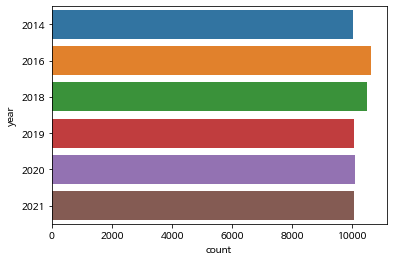

In [90]:
a = df.year.value_counts()
sns.countplot(y="year", data=df)
print(a)

### **[휴일]setup**

In [91]:
#휴일 유형별/만족도/희망
weekend_act = df[['year',	
                   'Q12_1_A',
                   'Q12_1_B',
                   'Q12_1_C',
                   'Q12_1_D',
                   'Q12_1_E',
                   'Q12_1_F',
                   'Q12_1_G',
                   'Q12_1_H',
                   ]]
weekend_st = df[['year', 
                   'Q12_2_A',
                   'Q12_2_B',
                   'Q12_2_C',
                   'Q12_2_D',
                   'Q12_2_E',
                   'Q12_2_F',
                   'Q12_2_G',
                   'Q12_2_H',]]
weekend_hp = df [['year',
                   'Q12_3_A',
                   'Q12_3_B',
                   'Q12_3_C',
                   'Q12_3_D',
                   'Q12_3_E',
                   'Q12_3_F',
                   'Q12_3_G',
                   'Q12_3_H']]

In [92]:
weekend_hp.tail(5)

,year,Q12_3_A,Q12_3_B,Q12_3_C,Q12_3_D,Q12_3_E,Q12_3_F,Q12_3_G,Q12_3_H
61326,2021,영화관람,없음,없음,없음,해외여행,쇼핑/외식,아무것도 안 하기,친구만남/이성교제/미팅/소개팅
61327,2021,연극공연 관람(뮤지컬 포함),없음,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",골프,해외여행,음주,산책 및 걷기,계모임/동창회/사교(파티)모임
61328,2021,영화관람,문학행사참여,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)","배드민턴/줄넘기/맨손, 스트레칭 체조/훌라후프",국내캠핑,게임(온라인/모바일/콘솔게임 등),음악 감상,사회봉사활동
61329,2021,영화관람,"미술활동(그림, 서예, 조각, 디자인, 도예, 만화 등)","스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",수영,자동차 드라이브,요리하기/다도,목욕/사우나/찜질방,종교활동
61330,2021,연극공연 관람(뮤지컬 포함),사진촬영(디지털카메라 포함),"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",수영,해외여행,등산,목욕/사우나/찜질방,사회봉사활동


In [93]:
weekend_act.tail(5)

,year,Q12_1_A,Q12_1_B,Q12_1_C,Q12_1_D,Q12_1_E,Q12_1_F,Q12_1_G,Q12_1_H
61326,2021,영화관람,없음,없음,없음,지역축제 참가,쇼핑/외식,TV시청(IPTV 포함),친구만남/이성교제/미팅/소개팅
61327,2021,98,없음,없음,골프,없음,음주,산책 및 걷기,계모임/동창회/사교(파티)모임
61328,2021,영화관람,없음,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)","배드민턴/줄넘기/맨손, 스트레칭 체조/훌라후프",없음,게임(온라인/모바일/콘솔게임 등),TV시청(IPTV 포함),친구만남/이성교제/미팅/소개팅
61329,2021,98,없음,"스포츠 경기 직접관람- 경기장방문관람(축구, 야구,농구, 배구 등)",없음,자동차 드라이브,쇼핑/외식,음악 감상,친구만남/이성교제/미팅/소개팅
61330,2021,영화관람,없음,없음,없음,국내캠핑,쇼핑/외식,TV시청(IPTV 포함),친구만남/이성교제/미팅/소개팅


In [94]:
weekend_st.tail(5)

,year,Q12_2_A,Q12_2_B,Q12_2_C,Q12_2_D,Q12_2_E,Q12_2_F,Q12_2_G,Q12_2_H
61326,2021,무용공연 관람,NaN,NaN,NaN,7.0,6.0,5.0,6.0
61327,2021,NaN,NaN,NaN,7.0,NaN,7.0,7.0,7.0
61328,2021,무용공연 관람,NaN,6.0,6.0,NaN,5.0,6.0,6.0
61329,2021,NaN,NaN,5.0,NaN,6.0,6.0,5.0,5.0
61330,2021,무용공연 관람,NaN,NaN,NaN,7.0,6.0,6.0,6.0


### **[휴일]분야별 참여 여가 수 비교 및 변화**

In [95]:
mask1 = (weekend_act.year == 2014)
weekend_act_2014 = weekend_act.loc[mask1, :]

mask2 = (weekend_act.year == 2015)
weekend_act_2015 = weekend_act.loc[mask2, :]

mask3 = (weekend_act.year == 2016)
weekend_act_2016 = weekend_act.loc[mask3, :]

mask4 = (weekend_act.year == 2017)
weekend_act_2017 = weekend_act.loc[mask4, :]

mask5 = (weekend_act.year == 2018)
weekend_act_2018 = weekend_act.loc[mask5, :]

mask6 = (weekend_act.year == 2019)
weekend_act_2019 = weekend_act.loc[mask6, :]

mask7 = (weekend_act.year == 2020)
weekend_act_2020 = weekend_act.loc[mask7, :]

mask8 = (weekend_act.year == 2021)
weekend_act_2021 = weekend_act.loc[mask8, :]

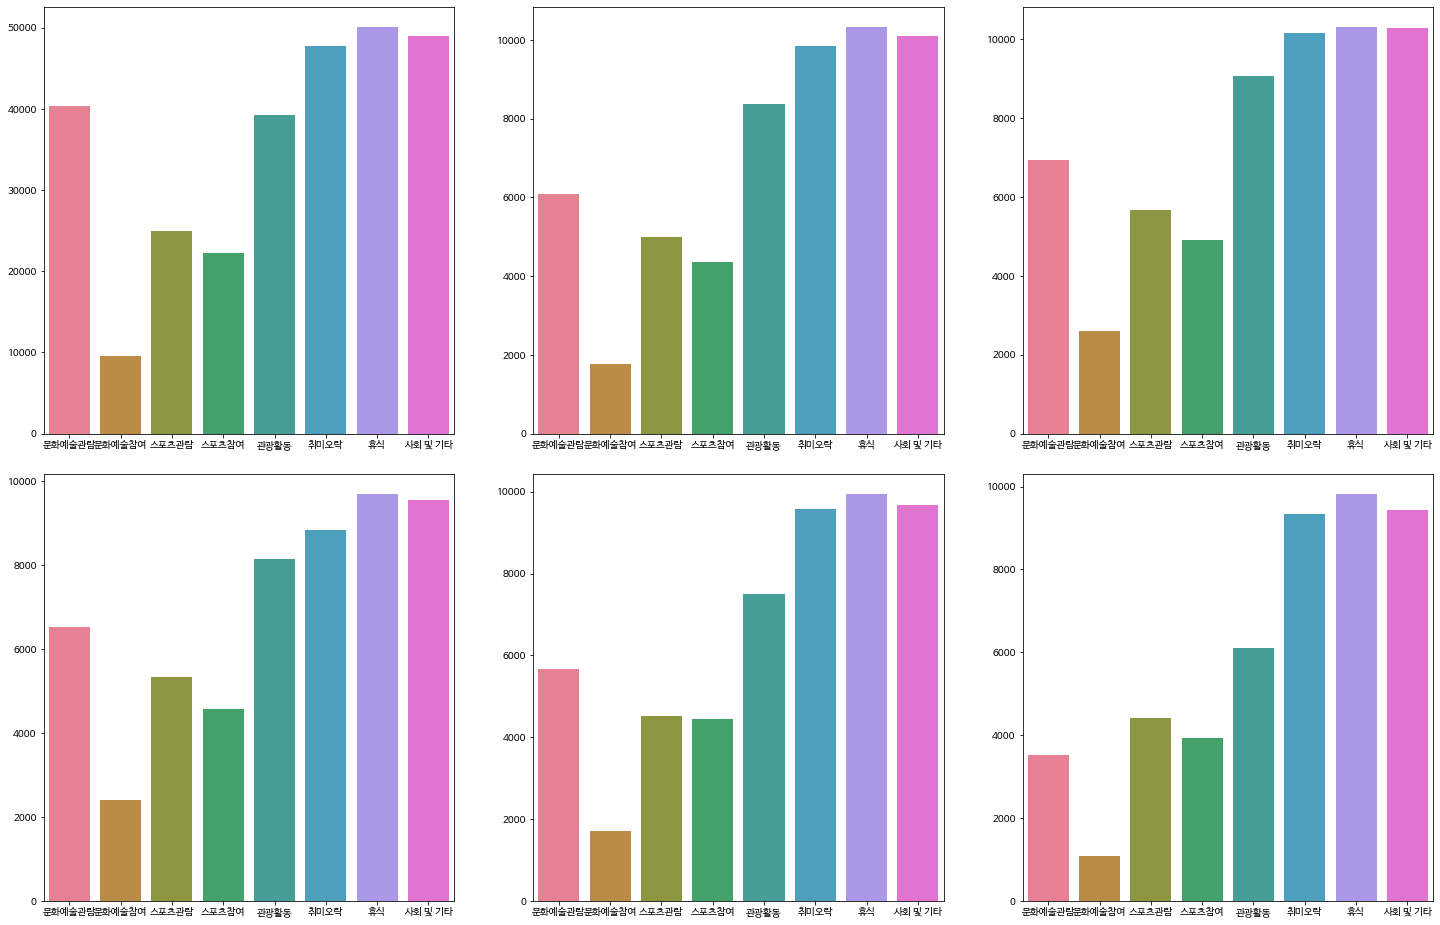

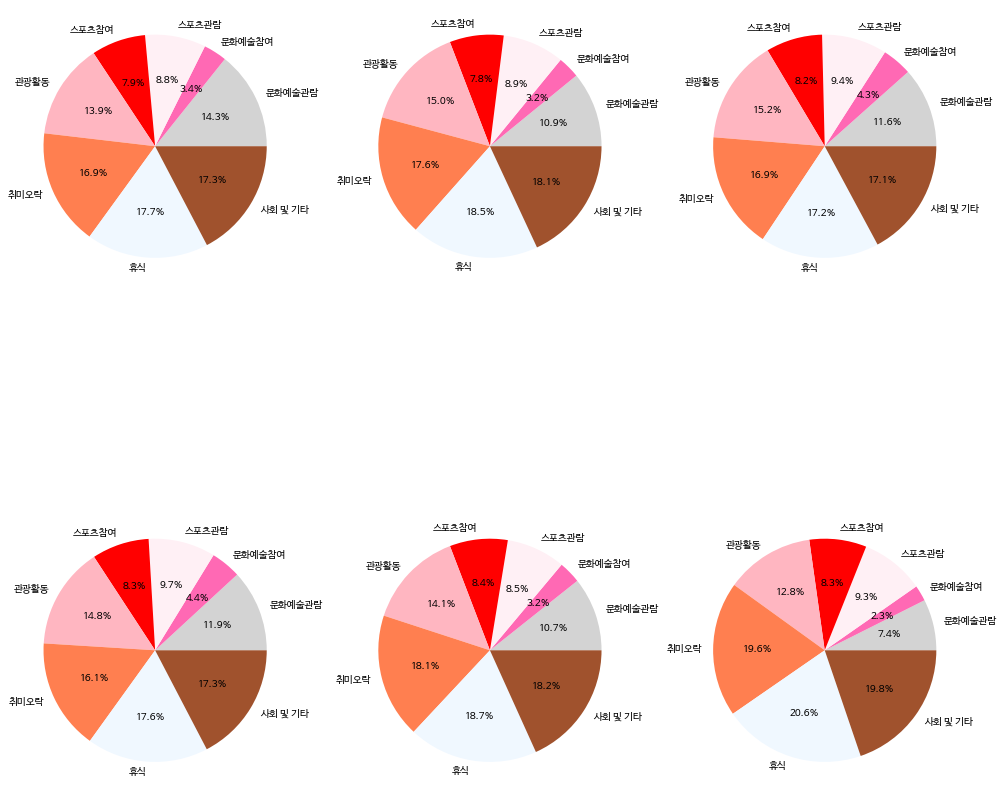

In [96]:
temfig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,13))
plt.tight_layout(h_pad=2, w_pad=5)

#[휴일]분야별 전체 참여 여가 수 비교
temp = sum(weekend_act.Q12_1_A.value_counts().drop(['99']))
temp2 = sum(weekend_act.Q12_1_B.value_counts().drop(['없음','무응답']))
temp3 = sum(weekend_act.Q12_1_C.value_counts().drop(['없음','무응답']))
temp4 = sum(weekend_act.Q12_1_D.value_counts().drop(['없음','무응답']))
temp5 = sum(weekend_act.Q12_1_E.value_counts().drop(['없음','무응답']))
temp6 = sum(weekend_act.Q12_1_F.value_counts().drop(['없음','무응답']))
temp7 = sum(weekend_act.Q12_1_G.value_counts().drop(['없음','무응답']))
temp8 = sum(weekend_act.Q12_1_H.value_counts().drop(['없음','무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2


colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.figure(figsize=(17,17))
plt.subplot(231)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,0],palette='husl')

#[휴일]2016년 분야별 전체 참여 여가 수 비교
temp = sum(weekend_act_2016.Q12_1_A.value_counts().drop(['98']))
temp2 = sum(weekend_act_2016.Q12_1_B.value_counts().drop(['없음']))
temp3 = sum(weekend_act_2016.Q12_1_C.value_counts().drop(['없음']))
temp4 = sum(weekend_act_2016.Q12_1_D.value_counts().drop(['없음']))
temp5 = sum(weekend_act_2016.Q12_1_E.value_counts().drop(['없음']))
temp6 = sum(weekend_act_2016.Q12_1_F.value_counts().drop(['없음']))
temp7 = sum(weekend_act_2016.Q12_1_G.value_counts().drop(['없음']))
temp8 = sum(weekend_act_2016.Q12_1_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(232)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,1],palette='husl')

#[휴일]2018년 분야별 전체 참여 여가 수 비교
temp = sum(weekend_act_2018.Q12_1_A.value_counts().drop(['98']))
temp2 = sum(weekend_act_2018.Q12_1_B.value_counts().drop(['없음']))
temp3 = sum(weekend_act_2018.Q12_1_C.value_counts().drop(['없음']))
temp4 = sum(weekend_act_2018.Q12_1_D.value_counts().drop(['없음']))
temp5 = sum(weekend_act_2018.Q12_1_E.value_counts().drop(['없음']))
temp6 = sum(weekend_act_2018.Q12_1_F.value_counts().drop(['없음']))
temp7 = sum(weekend_act_2018.Q12_1_G.value_counts().drop(['없음']))
temp8 = sum(weekend_act_2018.Q12_1_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(233)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,2],palette='husl')

#[휴일]2019년 분야별 전체 참여 여가 수 비교
temp = sum(weekend_act_2019.Q12_1_A.value_counts().drop(['99']))
temp2 = sum(weekend_act_2019.Q12_1_B.value_counts().drop(['무응답']))
temp3 = sum(weekend_act_2019.Q12_1_C.value_counts().drop(['무응답']))
temp4 = sum(weekend_act_2019.Q12_1_D.value_counts().drop(['무응답']))
temp5 = sum(weekend_act_2019.Q12_1_E.value_counts().drop(['무응답']))
temp6 = sum(weekend_act_2019.Q12_1_F.value_counts().drop(['무응답']))
temp7 = sum(weekend_act_2019.Q12_1_G.value_counts().drop(['무응답']))
temp8 = sum(weekend_act_2019.Q12_1_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(234)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,0],palette='husl')

#[휴일]2020년 분야별 전체 참여 여가 수 비교
temp = sum(weekend_act_2020.Q12_1_A.value_counts().drop(['99']))
temp2 = sum(weekend_act_2020.Q12_1_B.value_counts().drop(['무응답']))
temp3 = sum(weekend_act_2020.Q12_1_C.value_counts().drop(['무응답']))
temp4 = sum(weekend_act_2020.Q12_1_D.value_counts().drop(['무응답']))
temp5 = sum(weekend_act_2020.Q12_1_E.value_counts().drop(['무응답']))
temp6 = sum(weekend_act_2020.Q12_1_F.value_counts().drop(['무응답']))
temp7 = sum(weekend_act_2020.Q12_1_G.value_counts().drop(['무응답']))
temp8 = sum(weekend_act_2020.Q12_1_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(235)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,1],palette='husl')

#[휴일]2021년 분야별 전체 참여 여가 수 비교
temp = sum(weekend_act_2021.Q12_1_A.value_counts().drop(['98']))
temp2 = sum(weekend_act_2021.Q12_1_B.value_counts().drop(['없음']))
temp3 = sum(weekend_act_2021.Q12_1_C.value_counts().drop(['없음']))
temp4 = sum(weekend_act_2021.Q12_1_D.value_counts().drop(['없음']))
temp5 = sum(weekend_act_2021.Q12_1_E.value_counts().drop(['없음']))
temp6 = sum(weekend_act_2021.Q12_1_F.value_counts().drop(['없음']))
temp7 = sum(weekend_act_2021.Q12_1_G.value_counts().drop(['없음']))
temp8 = sum(weekend_act_2021.Q12_1_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(236)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,2],palette='husl')

                 0
2016년   761.750000
2018년  1377.714286
2019년   867.875000
2020년   817.000000
2021년   709.000000
                 0
2016년   253.142857
2018년  1377.714286
2019년   371.000000
2020년   344.142857
2021년   243.285714
                 0
2016년  1248.250000
2018년  1377.714286
2019년  1414.500000
2020년  1335.000000
2021년  1130.500000
                 0
2016년   242.611111
2018년  1377.714286
2019년   272.222222
2020년   253.555556
2021년   247.500000
                 0
2016년   761.636364
2018년  1377.714286
2019년   824.818182
2020년   740.818182
2021년   682.181818
                 0
2016년   517.842105
2018년  1377.714286
2019년   482.904762
2020년   402.000000
2021년   435.363636
                 0
2016년  1146.888889
2018년  1377.714286
2019년  1144.333333
2020년  1076.333333
2021년  1103.666667
                 0
2016년  1121.555556
2018년  1377.714286
2019년  1141.000000
2020년  1061.555556
2021년  1075.111111


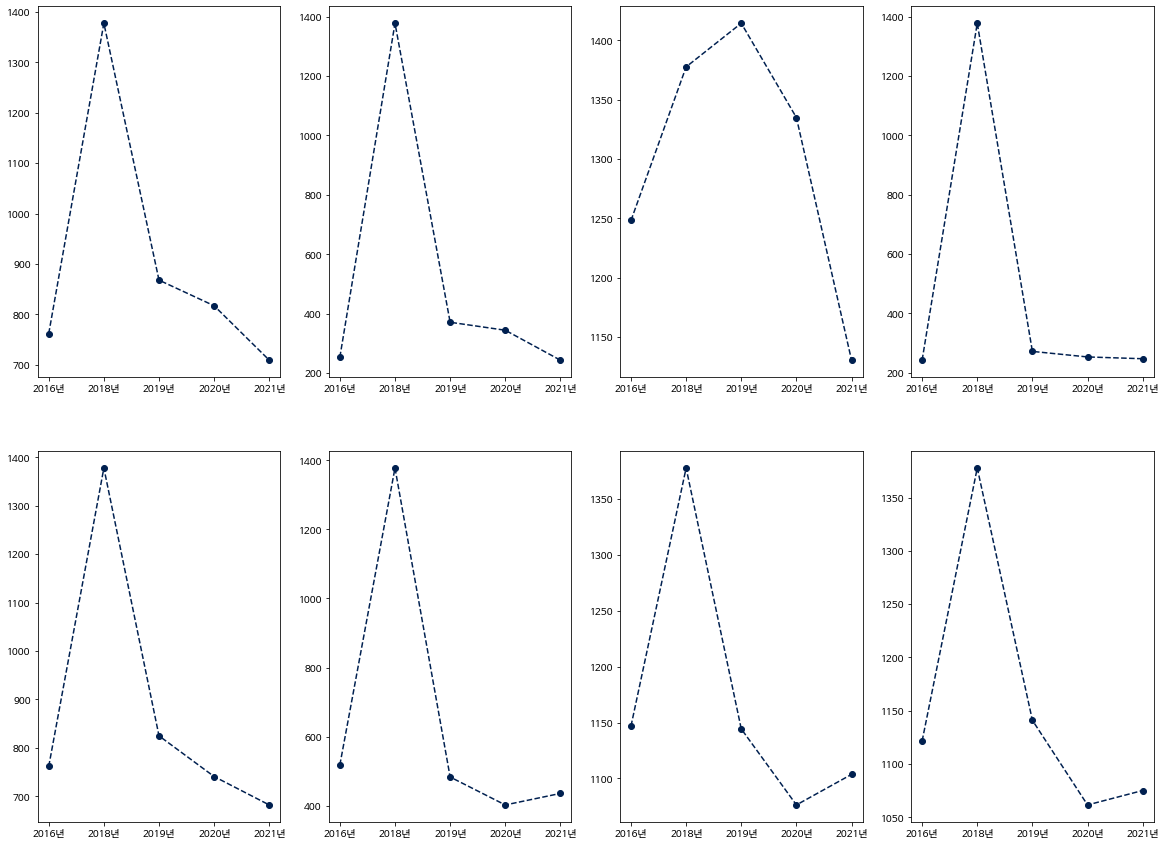

In [97]:
#문화 관람 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_A.value_counts().drop(['98']))
mean2 =np.mean(weekend_act_2018.Q12_1_A.value_counts().drop(['98']))
mean3 =np.mean(weekend_act_2019.Q12_1_A.value_counts().drop(['99']))
mean4 = np.mean(weekend_act_2020.Q12_1_A.value_counts().drop(['99']))
mean5 = np.mean(weekend_act_2021.Q12_1_A.value_counts().drop(['98']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.figure(figsize=(20,15))
plt.subplot(241)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#문화 참여 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_B.value_counts().drop(['없음']))
mean2 = np.mean(weekend_act_2018.Q12_1_B.value_counts().drop(['없음']))
mean3 = np.mean(weekend_act_2019.Q12_1_B.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_act_2020.Q12_1_B.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_act_2021.Q12_1_B.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(242)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#스포츠 관람 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_C.value_counts().drop(['없음']))
mean2 = np.mean(weekend_act_2018.Q12_1_C.value_counts().drop(['없음']))
mean3 = np.mean(weekend_act_2019.Q12_1_C.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_act_2020.Q12_1_C.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_act_2021.Q12_1_C.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(243)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#스포츠 참여 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_D.value_counts().drop(['없음']))
mean2 = np.mean(weekend_act_2018.Q12_1_D.value_counts().drop(['없음']))
mean3 = np.mean(weekend_act_2019.Q12_1_D.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_act_2020.Q12_1_D.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_act_2021.Q12_1_D.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(244)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#관광 활동 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_E.value_counts().drop(['없음']))
mean2 = np.mean(weekend_act_2018.Q12_1_E.value_counts().drop(['없음']))
mean3 = np.mean(weekend_act_2019.Q12_1_E.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_act_2020.Q12_1_E.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_act_2021.Q12_1_E.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(245)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')


#취미 오락 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_F.value_counts().drop(['없음']))
mean2 = np.mean(weekend_act_2018.Q12_1_F.value_counts().drop(['없음']))
mean3 = np.mean(weekend_act_2019.Q12_1_F.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_act_2020.Q12_1_F.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_act_2021.Q12_1_F.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(246)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#휴식 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_G.value_counts().drop(['없음']))
mean2 = np.mean(weekend_act_2018.Q12_1_G.value_counts().drop(['없음']))
mean3 = np.mean(weekend_act_2019.Q12_1_G.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_act_2020.Q12_1_G.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_act_2021.Q12_1_G.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(247)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#사회 및 기타 참여 변화
mean = np.mean(weekend_act_2016.Q12_1_H.value_counts().drop(['없음']))
mean2 = np.mean(weekend_act_2018.Q12_1_H.value_counts().drop(['없음']))
mean3 = np.mean(weekend_act_2019.Q12_1_H.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_act_2020.Q12_1_H.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_act_2021.Q12_1_H.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(248)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

### **[휴일]여가 활동 분야별 만족도 변화 및 흐름**

In [98]:
#[휴일] 여가 활동 분야별 만족도
mask1 = (weekend_st.year == 2014)
weekend_st_2014 = weekend_st.loc[mask1, :]

mask2 = (weekend_st.year == 2015)
weekend_st_2015 = weekend_st.loc[mask2, :]

mask3 = (weekend_st.year == 2016)
weekend_st_2016 = weekend_st.loc[mask3, :]

mask4 = (weekend_st.year == 2017)
weekend_st_2017 = weekend_st.loc[mask4, :]

mask5 = (weekend_st.year == 2018)
weekend_st_2018 = weekend_st.loc[mask5, :]

mask6 = (weekend_st.year == 2019)
weekend_st_2019 = weekend_st.loc[mask6, :]

mask7 = (weekend_st.year == 2020)
weekend_st_2020 = weekend_st.loc[mask7, :]

mask8 = (weekend_st.year == 2021)
weekend_st_2021 = weekend_st.loc[mask8, :]

In [99]:
##Q12_2_A에도 참여 만족도가 없음
div_cols_st = ['문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']

# 2014년에는 만족도 평가가 없음

#
st2016temp = weekend_st_2016.Q12_2_B.value_counts().dropna()
st2016temp2 = weekend_st_2016.Q12_2_C.value_counts().dropna()
st2016temp3 = weekend_st_2016.Q12_2_D.value_counts().dropna()
st2016temp4 = weekend_st_2016.Q12_2_E.value_counts().dropna()
st2016temp5 = weekend_st_2016.Q12_2_F.value_counts().dropna()
st2016temp6 = weekend_st_2016.Q12_2_G.value_counts().dropna()
st2016temp7 = weekend_st_2016.Q12_2_H.value_counts().dropna()

participate_div2016 = [st2016temp,st2016temp2,st2016temp3,st2016temp4,st2016temp5,st2016temp6,st2016temp7]
participate_div2_2016 = pd.DataFrame(participate_div2016, index = div_cols_st)


#
st2018temp = weekend_st_2018.Q12_2_B.value_counts().dropna()
st2018temp2 = weekend_st_2018.Q12_2_C.value_counts().dropna()
st2018temp3 = weekend_st_2018.Q12_2_D.value_counts().dropna()
st2018temp4 = weekend_st_2018.Q12_2_E.value_counts().dropna()
st2018temp5 = weekend_st_2018.Q12_2_F.value_counts().dropna()
st2018temp6 = weekend_st_2018.Q12_2_G.value_counts().dropna()
st2018temp7 = weekend_st_2018.Q12_2_H.value_counts().dropna()

participate_div2018 = [st2018temp,st2018temp2,st2018temp3,st2018temp4,st2018temp5,st2018temp6,st2018temp7]
participate_div2_2018 = pd.DataFrame(participate_div2018, index = div_cols_st)


#
st2019temp = weekend_st_2019.Q12_2_B.value_counts().dropna()
st2019temp2 = weekend_st_2019.Q12_2_C.value_counts().dropna()
st2019temp3 = weekend_st_2019.Q12_2_D.value_counts().dropna()
st2019temp4 = weekend_st_2019.Q12_2_E.value_counts().dropna()
st2019temp5 = weekend_st_2019.Q12_2_F.value_counts().dropna()
st2019temp6 = weekend_st_2019.Q12_2_G.value_counts().dropna()
st2019temp7 = weekend_st_2019.Q12_2_H.value_counts().dropna()

participate_div2019 = [st2019temp,st2019temp2,st2019temp3,st2019temp4,st2019temp5,st2019temp6,st2019temp7]
participate_div2_2019 = pd.DataFrame(participate_div2019, index = div_cols_st)


#
st2020temp = weekend_st_2020.Q12_2_B.value_counts().dropna()
st2020temp2 = weekend_st_2020.Q12_2_C.value_counts().dropna()
st2020temp3 = weekend_st_2020.Q12_2_D.value_counts().dropna()
st2020temp4 = weekend_st_2020.Q12_2_E.value_counts().dropna()
st2020temp5 = weekend_st_2020.Q12_2_F.value_counts().dropna()
st2020temp6 = weekend_st_2020.Q12_2_G.value_counts().dropna()
st2020temp7 = weekend_st_2020.Q12_2_H.value_counts().dropna()

participate_div2020 = [st2020temp,st2020temp2,st2020temp3,st2020temp4,st2020temp5,st2020temp6,st2020temp7]
participate_div2_2020 = pd.DataFrame(participate_div2020, index = div_cols_st)


# 
st2021temp =  weekend_st_2021.Q12_2_B.value_counts().dropna()
st2021temp2 = weekend_st_2021.Q12_2_C.value_counts().dropna()
st2021temp3 = weekend_st_2021.Q12_2_D.value_counts().dropna()
st2021temp4 = weekend_st_2021.Q12_2_E.value_counts().dropna()
st2021temp5 = weekend_st_2021.Q12_2_F.value_counts().dropna()
st2021temp6 = weekend_st_2021.Q12_2_G.value_counts().dropna()
st2021temp7 = weekend_st_2021.Q12_2_H.value_counts().dropna()

participate_div2021 = [st2021temp,st2021temp2,st2021temp3,st2021temp4,st2021temp5,st2021temp6,st2021temp7]
participate_div2_2021 = pd.DataFrame(participate_div2021, index = div_cols_st)


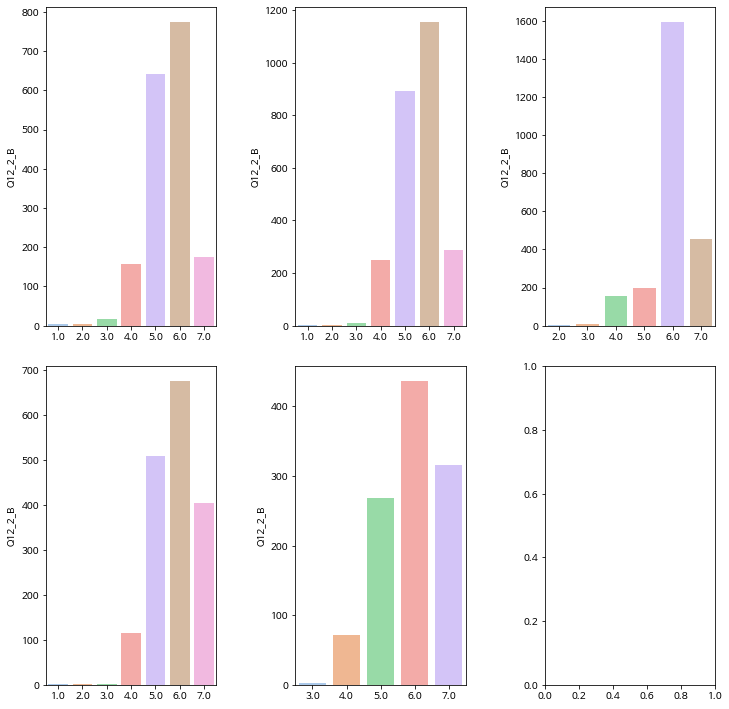

In [100]:
#[휴일]2016-2021 "문화참여" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())
st2021temp32 = pd.DataFrame(weekend_st_2021.Q12_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2018temp, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2019temp, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp32.index, y = st2021temp, ax=ax[1,1], palette='pastel')

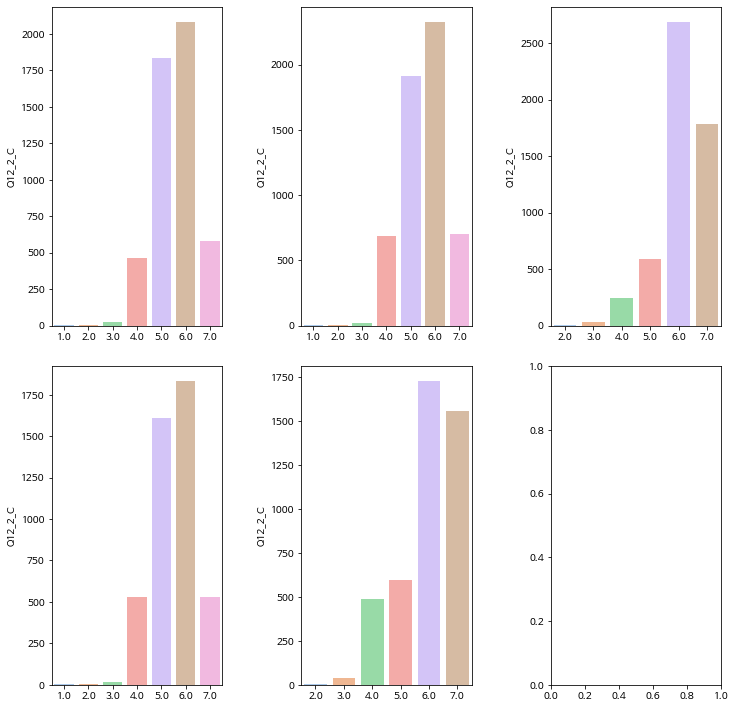

In [101]:
#[휴일]2016-2021 "스포츠관람" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())
st2021temp32 = pd.DataFrame(weekend_st_2021.Q12_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp2, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2018temp2, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2019temp2, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp2, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2021temp2, ax=ax[1,1], palette='pastel')

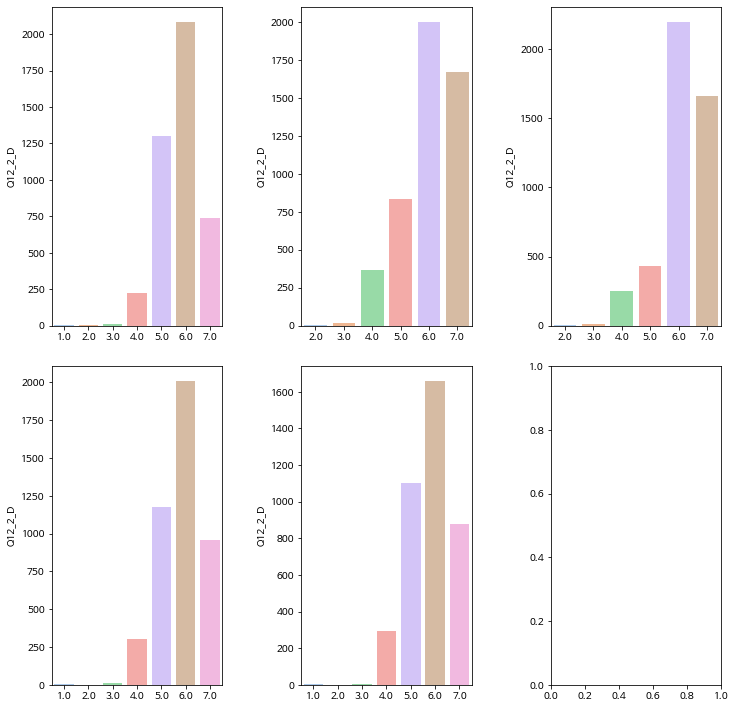

In [102]:
#[휴일]2016-2021 "스포츠참여" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())
st2021temp32 = pd.DataFrame(weekend_st_2021.Q12_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp3, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2018temp3, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2019temp3, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp3, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2021temp3, ax=ax[1,1], palette='pastel')

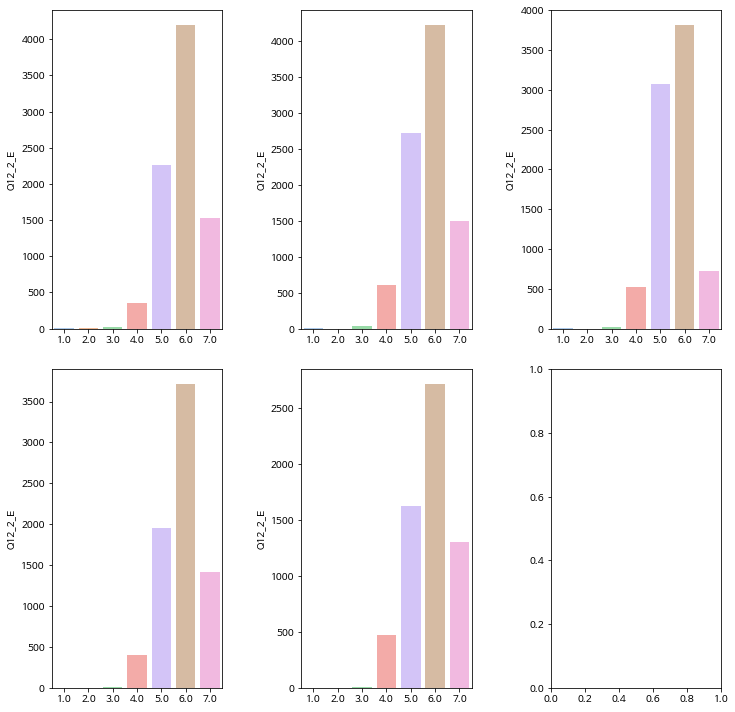

In [103]:
#[휴일]2016-2021 "관광활동" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())
st2021temp32 = pd.DataFrame(weekend_st_2021.Q12_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp4, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2018temp4, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2019temp4, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp4, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2021temp4, ax=ax[1,1], palette='pastel')

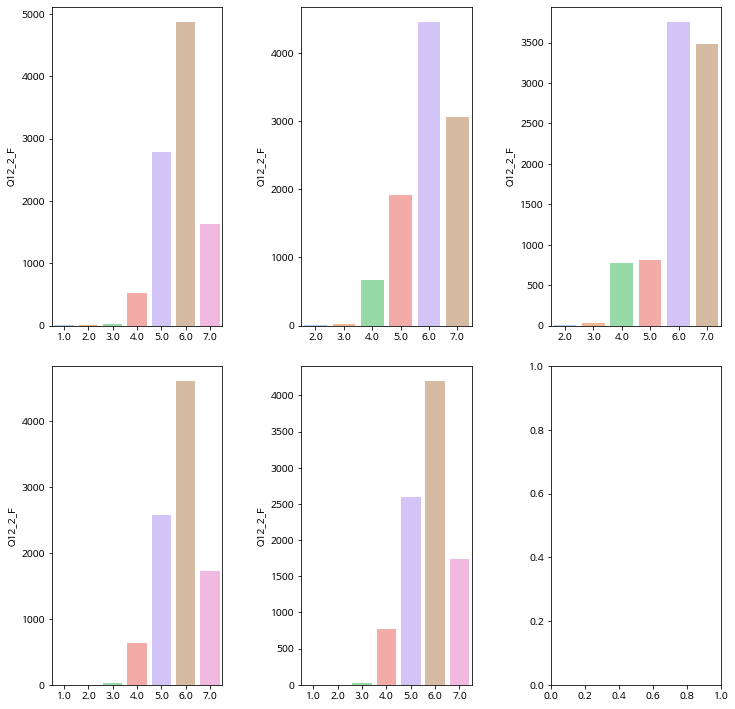

In [104]:
#[휴일]2016-2021 "취미오락" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())
st2021temp32 = pd.DataFrame(weekend_st_2021.Q12_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp5, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2018temp5, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2019temp5, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp5, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2021temp5, ax=ax[1,1], palette='pastel')

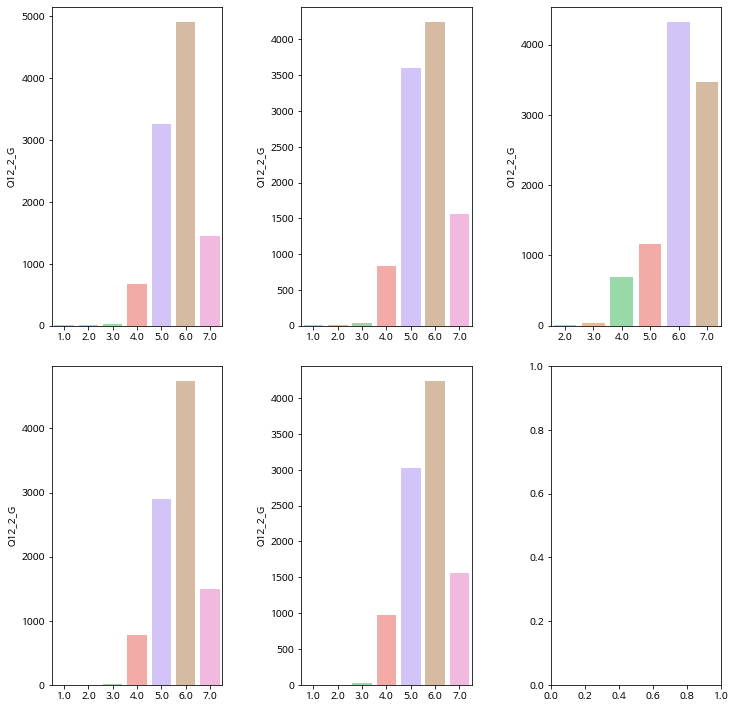

In [105]:
#[휴일]2016-2021 "휴식" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())
st2021temp32 = pd.DataFrame(weekend_st_2021.Q12_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp6, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2018temp6, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2019temp6, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp6, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2021temp6, ax=ax[1,1], palette='pastel')

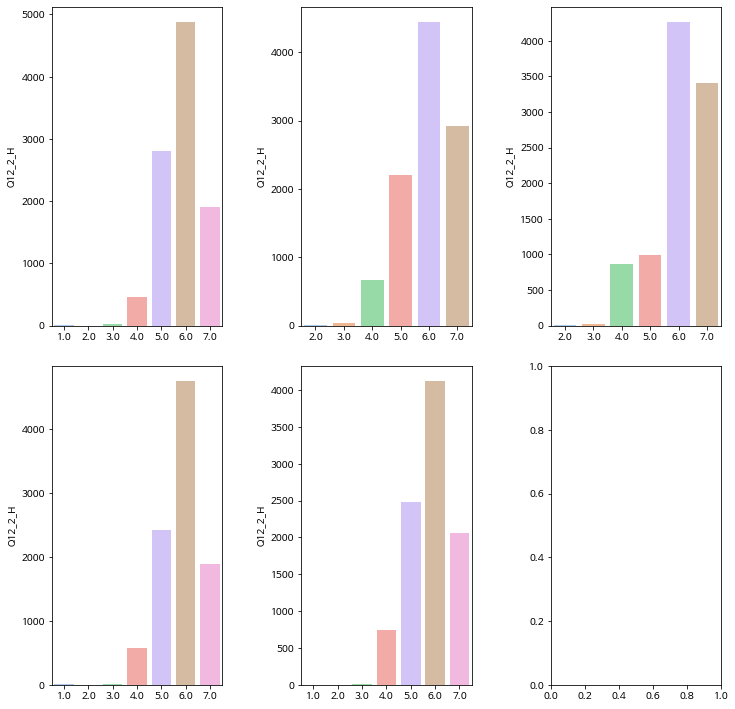

In [106]:
#[휴일]2016-2021 "사회 및 기타" 만족도 변화
st2021temp31 = pd.DataFrame(weekday_st_2021.Q11_2_B.value_counts().dropna())
st2016temp31 = pd.DataFrame(weekday_st_2016.Q11_2_B.value_counts().dropna())
st2021temp32 = pd.DataFrame(weekend_st_2021.Q12_2_B.value_counts().dropna())

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(10,10))
plt.tight_layout(h_pad=2, w_pad=5)
sns.barplot(x=st2016temp31.index, y = st2016temp7, ax=ax[0,0], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2018temp7, ax=ax[0,1], palette='pastel')
sns.barplot(x=st2021temp31.index, y = st2019temp7, ax=ax[0,2], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2020temp7, ax=ax[1,0], palette='pastel')
sns.barplot(x=st2016temp31.index, y = st2021temp7, ax=ax[1,1], palette='pastel')

                0
2016년  253.142857
2018년  371.000000
2019년  401.500000
2020년  243.428571
2021년  218.800000
                0
2016년  713.285714
2018년  808.285714
2019년  890.000000
2020년  646.000000
2021년  735.166667
                0
2016년  623.857143
2018년  816.666667
2019년  760.666667
2020년  636.285714
2021년  562.714286
                 0
2016년  1196.857143
2018년  1296.142857
2019년  1164.142857
2020년  1072.000000
2021년   873.571429
                 0
2016년  1405.571429
2018년  1690.166667
2019년  1474.000000
2020년  1368.285714
2021년  1332.285714
                 0
2016년  1474.571429
2018년  1471.285714
2019년  1614.500000
2020년  1419.000000
2021년  1401.428571
                 0
2016년  1442.000000
2018년  1711.500000
2019년  1592.333333
2020년  1382.285714
2021년  1346.000000


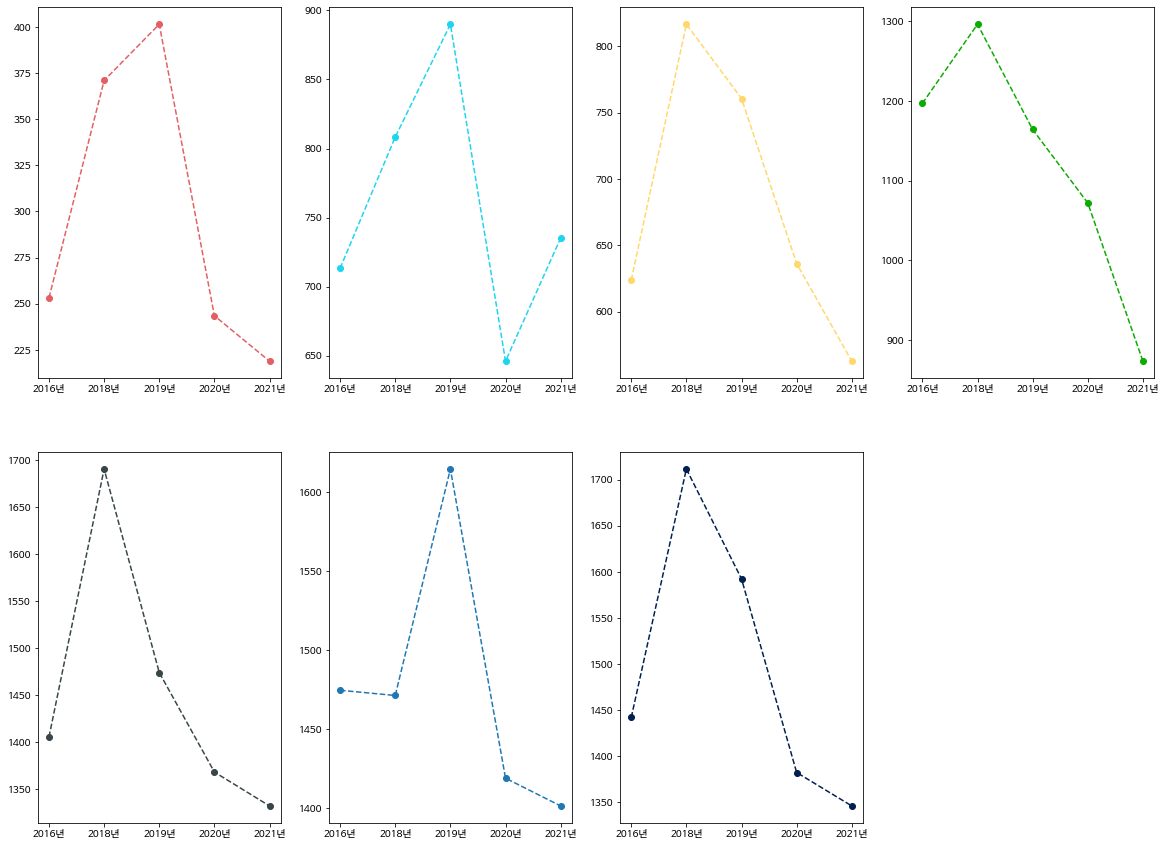

In [107]:
#[휴일]2016-2021 연도별 "문화참여" 만족도 흐름
mean = np.mean(st2016temp)
mean1 = np.mean(st2018temp)
mean2 = np. mean(st2019temp)
mean3 = np. mean (st2020temp)
mean4 = np.mean(st2021temp)

culact_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
culact_mean = pd.DataFrame(culact_list,year_list)

print(culact_mean)

plt.figure(figsize=(20,15))
plt.subplot(241)
s=culact_mean[0]
plt.plot(s.index, s.values,color='#e35f62',
         marker='o', linestyle='--')

#[휴일]2016-2021 연도별 "스포츠관람" 만족도 흐름
mean = np.mean(st2016temp2)
mean1 = np.mean(st2018temp2)
mean2 = np. mean(st2019temp2)
mean3 = np. mean (st2020temp2)
mean4 = np.mean(st2021temp2)

sptwat_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
sptwat_mean = pd.DataFrame(sptwat_list,year_list)

print(sptwat_mean)

plt.subplot(242)
s=sptwat_mean[0]
plt.plot(s.index, s.values,color='#1DD5EE',
         marker='o', linestyle='--')

#[평일]2016-2021 연도별 "스포츠참여" 만족도 흐름
mean = np.mean(st2016temp3)
mean1 = np.mean(st2018temp3)
mean2 = np. mean(st2019temp3)
mean3 = np. mean (st2020temp3)
mean4 = np.mean(st2021temp3)

spt_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
spt_mean = pd.DataFrame(spt_list,year_list)

print(spt_mean)

plt.subplot(243)
s=spt_mean[0]
plt.plot(s.index, s.values,color='#FFD86C',
         marker='o', linestyle='--')

#[평일]2016-2021 연도별 "관광활동" 만족도 흐름
mean = np.mean(st2016temp4)
mean1 = np.mean(st2018temp4)
mean2 = np. mean(st2019temp4)
mean3 = np. mean (st2020temp4)
mean4 = np.mean(st2021temp4)

t_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
t_mean = pd.DataFrame(t_list,year_list)

print(t_mean)
plt.subplot(244)
s=t_mean[0]
plt.plot(s.index, s.values,color='#0AAC00',
         marker='o', linestyle='--')

#[평일]2016-2021 연도별 "취미오락" 만족도 흐름
mean = np.mean(st2016temp5)
mean1 = np.mean(st2018temp5)
mean2 = np. mean(st2019temp5)
mean3 = np. mean (st2020temp5)
mean4 = np.mean(st2021temp5)

hb_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
hb_mean = pd.DataFrame(hb_list,year_list)

print(hb_mean)

plt.subplot(245)
s=hb_mean[0]
plt.plot(s.index, s.values,color='#374649',
         marker='o', linestyle='--')

#[평일]2016-2021 연도별 "휴식" 만족도 흐름
mean = np.mean(st2016temp6)
mean1 = np.mean(st2018temp6)
mean2 = np. mean(st2019temp6)
mean3 = np. mean (st2020temp6)
mean4 = np.mean(st2021temp6)

res_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
res_mean = pd.DataFrame(res_list,year_list)

print(res_mean)

plt.subplot(246)
s=res_mean[0]
plt.plot(s.index, s.values,
         marker='o', linestyle='--')

#[평일]2016-2021 연도별 "사회 및 기타" 만족도 흐름
mean = np.mean(st2016temp7)
mean1 = np.mean(st2018temp7)
mean2 = np. mean(st2019temp7)
mean3 = np. mean (st2020temp7)
mean4 = np.mean(st2021temp7)

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(247)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

### **[휴일]희망 여가 수 비교**

In [108]:
#[휴일] 희망 여가 활동
mask1 = (weekend_hp.year == 2014)
weekend_hp_2014 = weekend_hp.loc[mask1, :]

mask2 = (weekend_hp.year == 2015)
weekend_hp_2015 = weekend_hp.loc[mask2, :]

mask3 = (weekend_hp.year == 2016)
weekend_hp_2016 = weekend_hp.loc[mask3, :]

mask4 = (weekend_hp.year == 2017)
weekend_hp_2017 = weekend_hp.loc[mask4, :]

mask5 = (weekend_hp.year == 2018)
weekend_hp_2018 = weekend_hp.loc[mask5, :]

mask6 = (weekend_hp.year == 2019)
weekend_hp_2019 = weekend_hp.loc[mask6, :]

mask7 = (weekend_hp.year == 2020)
weekend_hp_2020 = weekend_hp.loc[mask7, :]

mask8 = (weekend_hp.year == 2021)
weekend_hp_2021 = weekend_hp.loc[mask8, :]

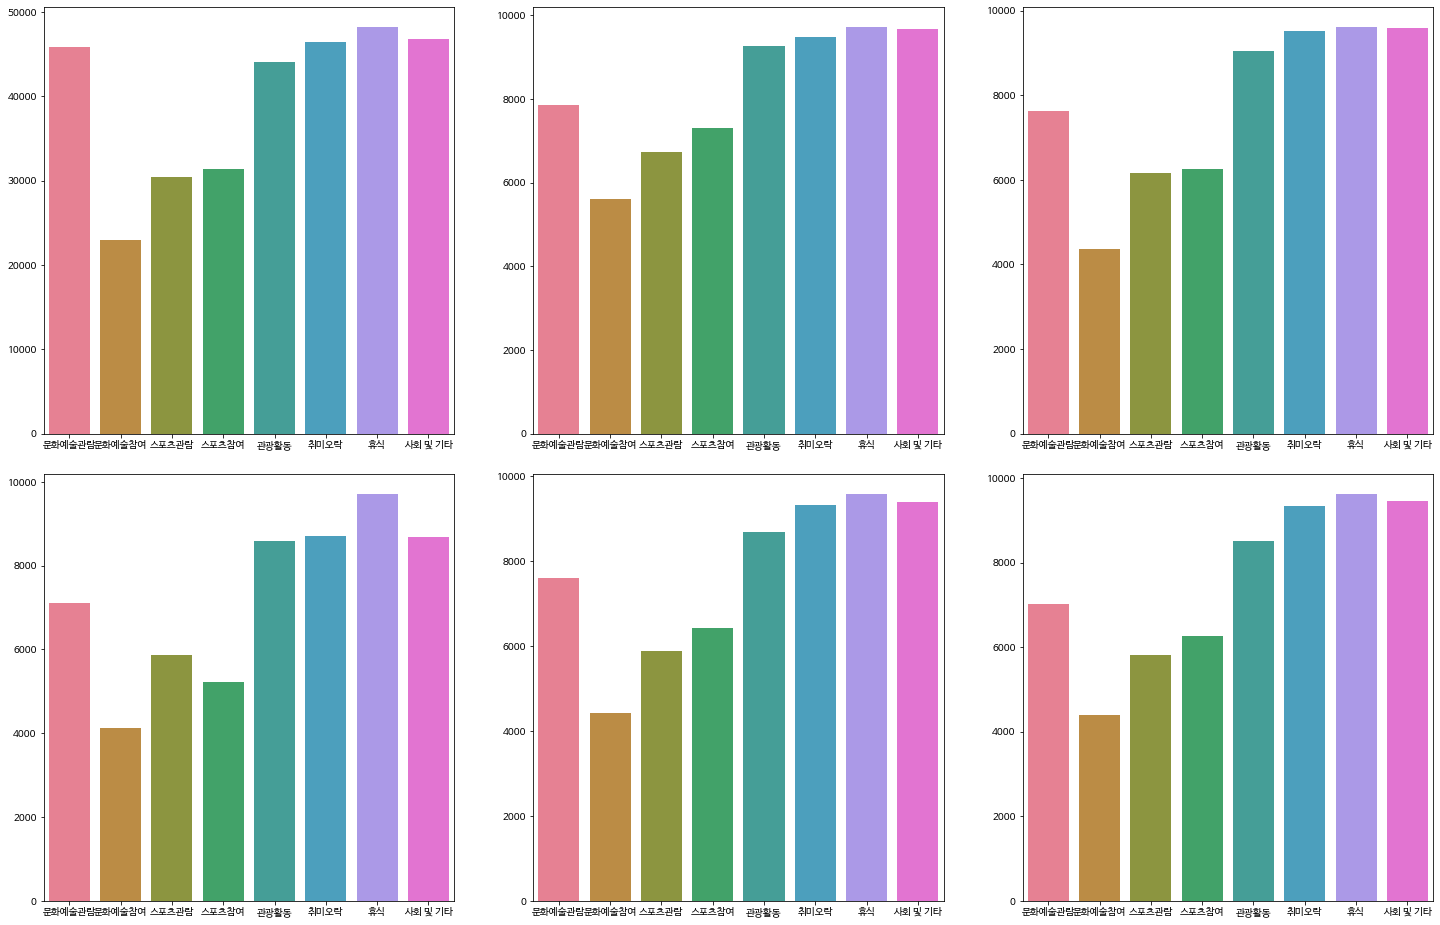

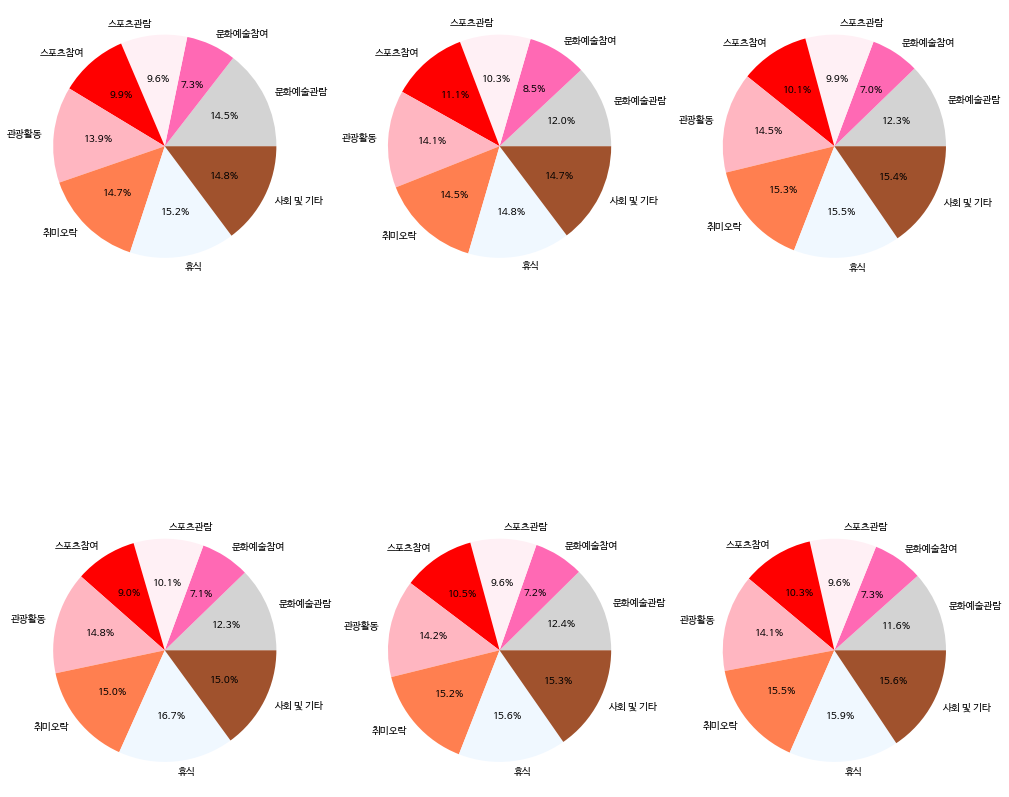

In [109]:
temfig, ax = plt.subplots(nrows=2,ncols=3, figsize=(20,13))
plt.tight_layout(h_pad=2, w_pad=5)

#[휴일]분야별 전체 희망 여가 수 비교
temp = sum(weekend_hp.Q12_3_A.value_counts().drop(['99']))
temp2 = sum(weekend_hp.Q12_3_B.value_counts().drop(['없음','무응답']))
temp3 = sum(weekend_hp.Q12_3_C.value_counts().drop(['없음','무응답']))
temp4 = sum(weekend_hp.Q12_3_D.value_counts().drop(['없음','무응답']))
temp5 = sum(weekend_hp.Q12_3_E.value_counts().drop(['없음','무응답']))
temp6 = sum(weekend_hp.Q12_3_F.value_counts().drop(['없음','무응답']))
temp7 = sum(weekend_hp.Q12_3_G.value_counts().drop(['없음','무응답']))
temp8 = sum(weekend_hp.Q12_3_H.value_counts().drop(['없음','무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.figure(figsize=(17,17))
plt.subplot(231)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,0],palette='husl')

#[휴일]2016년 분야별 전체 희망 여가 수 비교
temp = sum(weekend_hp_2016.Q12_3_A.value_counts().drop(['98']))
temp2 = sum(weekend_hp_2016.Q12_3_B.value_counts().drop(['없음']))
temp3 = sum(weekend_hp_2016.Q12_3_C.value_counts().drop(['없음']))
temp4 = sum(weekend_hp_2016.Q12_3_D.value_counts().drop(['없음']))
temp5 = sum(weekend_hp_2016.Q12_3_E.value_counts().drop(['없음']))
temp6 = sum(weekend_hp_2016.Q12_3_F.value_counts().drop(['없음']))
temp7 = sum(weekend_hp_2016.Q12_3_G.value_counts().drop(['없음']))
temp8 = sum(weekend_hp_2016.Q12_3_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(232)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,1],palette='husl')

#[휴일]2018년 분야별 전체 희망 여가 수 비교
temp = sum(weekend_hp_2018.Q12_3_A.value_counts().drop(['98']))
temp2 = sum(weekend_hp_2018.Q12_3_B.value_counts().drop(['없음']))
temp3 = sum(weekend_hp_2018.Q12_3_C.value_counts().drop(['없음']))
temp4 = sum(weekend_hp_2018.Q12_3_D.value_counts().drop(['없음']))
temp5 = sum(weekend_hp_2018.Q12_3_E.value_counts().drop(['없음']))
temp6 = sum(weekend_hp_2018.Q12_3_F.value_counts().drop(['없음']))
temp7 = sum(weekend_hp_2018.Q12_3_G.value_counts().drop(['없음']))
temp8 = sum(weekend_hp_2018.Q12_3_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(233)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[0,2],palette='husl')

#[휴일]2019년 분야별 전체 희망 여가 수 비교
temp = sum(weekend_hp_2019.Q12_3_A.value_counts().drop(['99']))
temp2 = sum(weekend_hp_2019.Q12_3_B.value_counts().drop(['무응답']))
temp3 = sum(weekend_hp_2019.Q12_3_C.value_counts().drop(['무응답']))
temp4 = sum(weekend_hp_2019.Q12_3_D.value_counts().drop(['무응답']))
temp5 = sum(weekend_hp_2019.Q12_3_E.value_counts().drop(['무응답']))
temp6 = sum(weekend_hp_2019.Q12_3_F.value_counts().drop(['무응답']))
temp7 = sum(weekend_hp_2019.Q12_3_G.value_counts().drop(['무응답']))
temp8 = sum(weekend_hp_2019.Q12_3_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(234)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,0],palette='husl')

#[휴일]2020년 분야별 전체 희망 여가 수 비교
temp = sum(weekend_hp_2020.Q12_3_A.value_counts().drop(['99']))
temp2 = sum(weekend_hp_2020.Q12_3_B.value_counts().drop(['무응답']))
temp3 = sum(weekend_hp_2020.Q12_3_C.value_counts().drop(['무응답']))
temp4 = sum(weekend_hp_2020.Q12_3_D.value_counts().drop(['무응답']))
temp5 = sum(weekend_hp_2020.Q12_3_E.value_counts().drop(['무응답']))
temp6 = sum(weekend_hp_2020.Q12_3_F.value_counts().drop(['무응답']))
temp7 = sum(weekend_hp_2020.Q12_3_G.value_counts().drop(['무응답']))
temp8 = sum(weekend_hp_2020.Q12_3_H.value_counts().drop(['무응답']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(235)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,1],palette='husl')

#[휴일]2021년 분야별 전체 희망 여가 수 비교
temp = sum(weekend_hp_2021.Q12_3_A.value_counts().drop(['98']))
temp2 = sum(weekend_hp_2021.Q12_3_B.value_counts().drop(['없음']))
temp3 = sum(weekend_hp_2021.Q12_3_C.value_counts().drop(['없음']))
temp4 = sum(weekend_hp_2021.Q12_3_D.value_counts().drop(['없음']))
temp5 = sum(weekend_hp_2021.Q12_3_E.value_counts().drop(['없음']))
temp6 = sum(weekend_hp_2021.Q12_3_F.value_counts().drop(['없음']))
temp7 = sum(weekend_hp_2021.Q12_3_G.value_counts().drop(['없음']))
temp8 = sum(weekend_hp_2021.Q12_3_H.value_counts().drop(['없음']))

div_cols = ['문화예술관람','문화예술참여','스포츠관람','스포츠참여','관광활동','취미오락','휴식','사회 및 기타']
participate_div = [temp,temp2,temp3,temp4,temp5,temp6,temp7,temp8]
participate_div2 = pd.DataFrame(participate_div, index = div_cols)
participate_div2

colors = ['lightgray', 'hotpink', 'lavenderblush', 'red', 'lightpink','coral','aliceblue','sienna']

plt.subplot(236)
pie1 = plt.pie(participate_div,labels = participate_div2.index,autopct='%.1f%%',colors=colors)
plot = sns.barplot(x = participate_div2.index , y = participate_div, ax=ax[1,2],palette='husl')

              0
2016년   982.625
2018년  1711.500
2019년   952.125
2020년   889.375
2021년   950.750
              0
2016년   801.000
2018년  1711.500
2019년   625.000
2020년   590.000
2021년   553.625
             0
2016년  1682.00
2018년  1711.50
2019년  1538.25
2020년  1469.25
2021년  1467.25
                 0
2016년   405.444444
2018년  1711.500000
2019년   347.111111
2020년   289.777778
2021년   338.000000
                 0
2016년   842.272727
2018년  1711.500000
2019년   822.000000
2020년   780.909091
2021년   667.076923
                 0
2016년   499.578947
2018년  1711.500000
2019년   453.428571
2020년   395.727273
2021년   423.409091
                 0
2016년  1079.444444
2018년  1711.500000
2019년  1067.555556
2020년  1077.777778
2021년   869.181818
                 0
2016년  1073.666667
2018년  1711.500000
2019년  1065.555556
2020년   965.444444
2021년  1043.333333


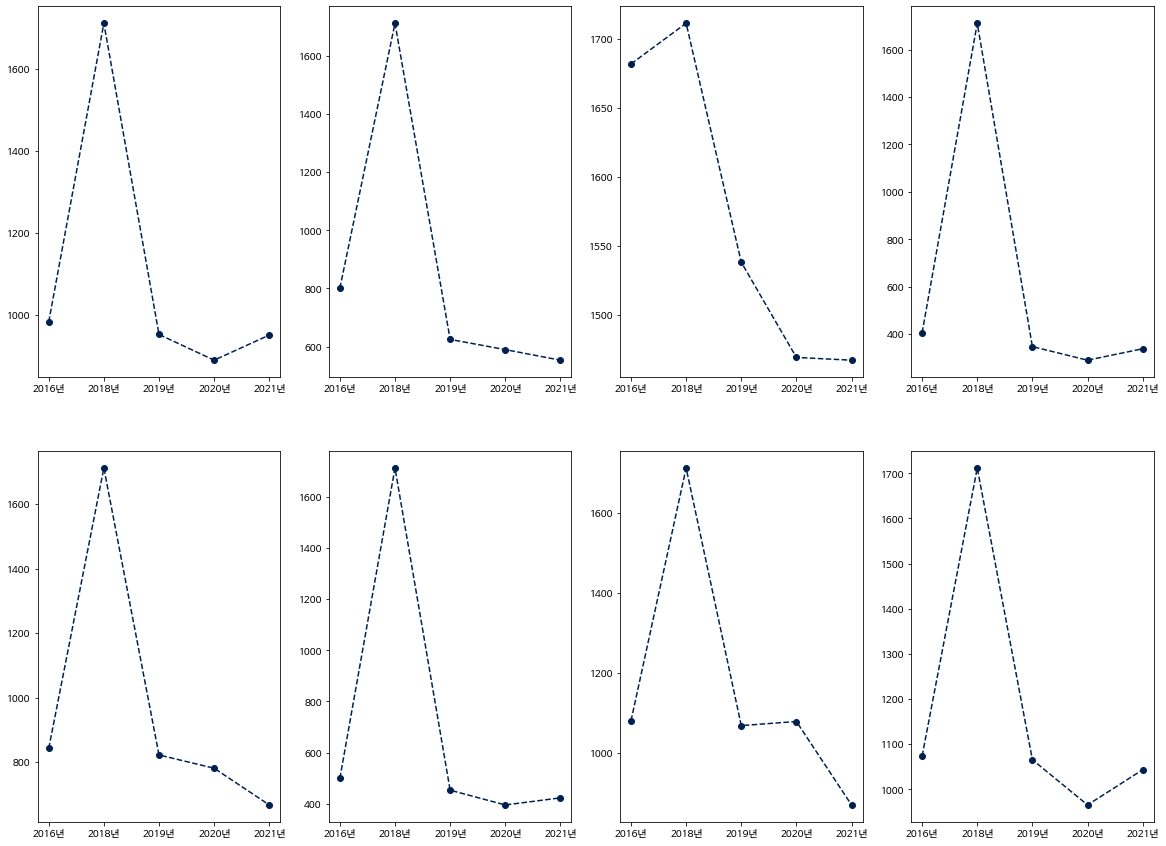

In [110]:
#문화 관람 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_A.value_counts().drop(['98']))
mean2 =np.mean(weekend_hp_2018.Q12_3_A.value_counts().drop(['98']))
mean3 =np.mean(weekend_hp_2019.Q12_3_A.value_counts().drop(['99']))
mean4 = np.mean(weekend_hp_2020.Q12_3_A.value_counts().drop(['99']))
mean5 = np.mean(weekend_hp_2021.Q12_3_A.value_counts().drop(['98']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.figure(figsize=(20,15))
plt.subplot(241)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#문화 참여 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_B.value_counts().drop(['없음']))
mean2 = np.mean(weekend_hp_2018.Q12_3_B.value_counts().drop(['없음']))
mean3 = np.mean(weekend_hp_2019.Q12_3_B.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_hp_2020.Q12_3_B.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_hp_2021.Q12_3_B.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(242)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#스포츠 관람 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_C.value_counts().drop(['없음']))
mean2 = np.mean(weekend_hp_2018.Q12_3_C.value_counts().drop(['없음']))
mean3 = np.mean(weekend_hp_2019.Q12_3_C.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_hp_2020.Q12_3_C.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_hp_2021.Q12_3_C.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(243)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#스포츠 참여 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_D.value_counts().drop(['없음']))
mean2 = np.mean(weekend_hp_2018.Q12_3_D.value_counts().drop(['없음']))
mean3 = np.mean(weekend_hp_2019.Q12_3_D.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_hp_2020.Q12_3_D.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_hp_2021.Q12_3_D.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(244)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#관광 활동 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_E.value_counts().drop(['없음']))
mean2 = np.mean(weekend_hp_2018.Q12_3_E.value_counts().drop(['없음']))
mean3 = np.mean(weekend_hp_2019.Q12_3_E.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_hp_2020.Q12_3_E.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_hp_2021.Q12_3_E.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(245)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')


#취미 오락 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_F.value_counts().drop(['없음']))
mean2 = np.mean(weekend_hp_2018.Q12_3_F.value_counts().drop(['없음']))
mean3 = np.mean(weekend_hp_2019.Q12_3_F.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_hp_2020.Q12_3_F.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_hp_2021.Q12_3_F.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(246)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#휴식 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_G.value_counts().drop(['없음']))
mean2 = np.mean(weekend_hp_2018.Q12_3_G.value_counts().drop(['없음']))
mean3 = np.mean(weekend_hp_2019.Q12_3_G.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_hp_2020.Q12_3_G.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_hp_2021.Q12_3_G.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(247)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')

#사회 및 기타 희망 변화
mean = np.mean(weekend_hp_2016.Q12_3_H.value_counts().drop(['없음']))
mean2 = np.mean(weekend_hp_2018.Q12_3_H.value_counts().drop(['없음']))
mean3 = np.mean(weekend_hp_2019.Q12_3_H.value_counts().drop(['무응답']))
mean4 = np.mean(weekend_hp_2020.Q12_3_H.value_counts().drop(['무응답']))
mean5 = np.mean(weekend_hp_2021.Q12_3_H.value_counts().drop(['없음']))

el_list=[mean,mean1,mean2,mean3,mean4]
year_list = ['2016년','2018년','2019년','2020년','2021년']
year_index = pd.DataFrame(year_list)
el_mean = pd.DataFrame(el_list,year_list)

print(el_mean)

plt.subplot(248)
s=el_mean[0]
plt.plot(s.index, s.values,color='#002050',
         marker='o', linestyle='--')